In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv")
df.head()

,Code,Year,X1,X2,X3,X4,X5,X6,X7,X8,...,X12,X13,X14,X15,X16,X17,X18,X19,SEN,Next_year_binary_distress_label
0,SD2,2010,1.986111,0.393715,0.413592,0.064695,0.412698,0.144177,0.067961,0.049908,...,0.582255,0.633803,0.230769,6.293419,6.244167,0.151571,0.349353,0.685714,0.0,0
1,SD1,2010,1.093110,0.079239,0.185185,0.026941,0.294118,0.039620,0.062963,0.019017,...,0.855784,6.760000,0.005111,6.447306,5.598422,0.045959,0.134707,0.994444,0.0,0
2,BBC,2010,1.809783,0.196311,0.189086,0.059289,0.385321,0.276680,0.057107,0.054018,...,0.281950,0.785235,0.093093,6.632002,6.669498,0.528327,0.718050,0.859813,0.0,0
3,SD4,2010,0.937282,-0.035928,-0.056250,0.035928,0.596639,0.141717,0.056250,0.025948,...,0.762475,-7.611111,0.356877,6.216606,5.768321,0.441118,0.237525,0.751309,0.0,0
4,SCR,2010,2.259175,0.438298,2.979409,0.077571,0.027879,0.008034,0.527305,0.055578,...,0.711313,0.728365,0.462067,8.934982,7.018402,0.001185,0.288160,0.489354,0.0,0


# Test Tunning

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
import pandas as pd
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Load graph mới
data = torch.load("/content/drive/MyDrive/KLTN/graph_data.pt")
data = data.to(device)

print(data)
print("Num nodes:", data.num_nodes)
print("Num edges:", data.edge_index.shape[1])

# Mapping comp-sector

In [ ]:
unique_company_codes = df['Code'].unique()
print("Unique Company Codes:")
print(unique_company_codes)
print(f"Number of unique company codes: {len(unique_company_codes)}")

Unique Company Codes:
['SD2' 'SD1' 'BBC' ... 'THM' 'PBT' 'HIO']
Number of unique company codes: 1429


In [ ]:
unique_company_codes

array(['SD2', 'SD1', 'BBC', ..., 'THM', 'PBT', 'HIO'], dtype=object)

In [ ]:
unique_codes_df = pd.DataFrame(unique_company_codes, columns=['Company_Code'])
unique_codes_df.to_csv('unique_company_codes.csv', index=False)
print("Unique company codes saved to 'unique_company_codes.csv'")

Unique company codes saved to 'unique_company_codes.csv'


In [ ]:
unique_codes_df.head()

,Company_Code
0,SD2
1,SD1
2,BBC
3,SD4
4,SCR


In [ ]:
df_unique = pd.read_csv("/content/drive/MyDrive/KLTN/unique_company_codes.csv")
df_info   = pd.read_csv("/content/drive/MyDrive/KLTN/danh_sach_cp_24hmoney.csv")

In [ ]:
df_unique.head()

,Company_Code
0,SD2
1,SD1
2,BBC
3,SD4
4,SCR


In [ ]:
df_info.head()

,Mã,Công ty,Ngành,Sàn
0,A32,Công ty cổ phần 32,Giầy dép,UPCOM
1,AAA,Công ty cổ phần Nhựa An Phát Xanh,"Nhựa, cao su & sợi",HOSE
2,AAH,Công ty Cổ phần Hợp Nhất,Khai thác Than,UPCOM
3,AAM,Công ty Cổ phần Thủy sản Mekong,Nuôi trồng nông & hải sản,HOSE
4,AAS,Công ty Cổ phần Chứng Khoán Smart Invest,Môi giới chứng khoán,UPCOM


In [ ]:
import difflib

print("Columns in unique:", df_unique.columns.tolist())
print("Columns in info:", df_info.columns.tolist())

Columns in unique: ['Company_Code']
Columns in info: ['Mã', 'Công ty', 'Ngành', 'Sàn']


In [ ]:
df_info = df_info.rename(columns={"Mã": "ticker"})
df_info = df_info.rename(columns={"Công ty": "company_name"})
df_info = df_info.rename(columns={"Ngành": "sector"})

df_unique['Company_Code'] = df_unique['Company_Code'].str.strip().str.upper()
df_info['ticker']         = df_info['ticker'].str.strip().str.upper()

df_merged = df_unique.merge(
    df_info[['ticker', 'company_name', 'sector']],
    left_on='Company_Code',
    right_on='ticker',
    how='left'
)

print(df_merged.head(20))
print("Shape:", df_merged.shape)

   Company_Code ticker                                   company_name  \
0           SD2    SD2                      Công ty Cổ phần Sông Đà 2   
1           SD1    SD1                      Công ty Cổ phần Sông Đà 1   
2           BBC    BBC                         Công ty Cổ phần Bibica   
3           SD4    SD4                      Công ty Cổ phần Sông Đà 4   
4           SCR    SCR      Công ty Cổ phần Địa ốc Sài Gòn Thương Tín   
5           SD3    SD3                      Công ty Cổ phần Sông Đà 3   
6           SD5    SD5                      Công ty Cổ phần Sông Đà 5   
7           HNM    HNM                     Công ty Cổ phần Sữa Hà Nội   
8           SD8    SD8                      Công ty Cổ phần Sông Đà 8   
9           SD7    SD7                      Công ty Cổ phần Sông Đà 7   
10          SD9    SD9                      Công ty Cổ phần Sông Đà 9   
11          HNP    HNP                 Công ty cổ phần Hanel Xốp nhựa   
12          HNR    HNR  Công ty Cổ phần Rượu và Nướ

In [ ]:
df_merged.head()

,Company_Code,ticker,company_name,sector
0,SD2,SD2,Công ty Cổ phần Sông Đà 2,Xây dựng
1,SD1,SD1,Công ty Cổ phần Sông Đà 1,Xây dựng
2,BBC,BBC,Công ty Cổ phần Bibica,Thực phẩm
3,SD4,SD4,Công ty Cổ phần Sông Đà 4,Xây dựng
4,SCR,SCR,Công ty Cổ phần Địa ốc Sài Gòn Thương Tín,Bất động sản


In [ ]:
cate = df_merged['sector'].unique()
cate = pd.DataFrame(cate)
cate

,0
0,Xây dựng
1,Thực phẩm
2,Bất động sản
3,"Nhựa, cao su & sợi"
4,Vang & Rượu mạnh
...,...
73,Tài chính đặc biệt
74,Đồ chơi
75,Khai thác vàng
76,Đường sắt


In [ ]:
null_sector_rows = df_merged[df_merged['sector'].isnull()]
print("Rows with null sector:")
display(null_sector_rows)

Rows with null sector:


,Company_Code,ticker,company_name,sector
18,SDJ,NaN,NaN,NaN
42,BDB,NaN,NaN,NaN
114,V11,NaN,NaN,NaN
173,KAC,NaN,NaN,NaN
197,KCE,NaN,NaN,NaN
220,BST,NaN,NaN,NaN
322,MTC,NaN,NaN,NaN
337,TBT,NaN,NaN,NaN
356,ING,NaN,NaN,NaN
369,CC4,NaN,NaN,NaN


In [ ]:
manual_df = pd.read_csv("/content/drive/MyDrive/KLTN/manual_label_sector.csv")
manual_df.head()

,Company_Code,ticker,company_name,sector
0,SDJ,SDJ,Công ty Cổ phần Sông Đà,Vật liệu xây dựng & Nội thất
1,BDB,BDB,CTCP Sách và Thiết bị Bình Định,Dịch vụ truyền thông
2,V11,V11,CTCP Xây dựng Số 11,Xây dựng
3,KAC,KAC,CTCP Đầu tư Địa ốc Khang An,Bất động sản
4,KCE,KCE,CTCP Bê tông Ly tâm Điện Lực Khánh Hòa,Vật liệu xây dựng & Nội thất


In [ ]:
df_tmp = df_merged.merge(manual_df, on='Company_Code', how='left', suffixes=('', '_new'))

for col in ['ticker', 'company_name', 'sector']:
    df_tmp[col] = df_tmp[col].fillna(df_tmp[col + '_new'])

df_tmp = df_tmp.drop(columns=[c for c in df_tmp.columns if c.endswith('_new')])


df_tmp.count()

,0
Company_Code,1429
ticker,1429
company_name,1429
sector,1429


In [ ]:
df_merged.head()

,Company_Code,ticker,company_name,sector
0,SD2,SD2,Công ty Cổ phần Sông Đà 2,Xây dựng
1,SD1,SD1,Công ty Cổ phần Sông Đà 1,Xây dựng
2,BBC,BBC,Công ty Cổ phần Bibica,Thực phẩm
3,SD4,SD4,Công ty Cổ phần Sông Đà 4,Xây dựng
4,SCR,SCR,Công ty Cổ phần Địa ốc Sài Gòn Thương Tín,Bất động sản


In [ ]:
df_merged[df_merged['sector']=='NaN']

,Company_Code,ticker,company_name,sector


In [ ]:
df_merged[df_merged['sector'].isnull()]

,Company_Code,ticker,company_name,sector
18,SDJ,NaN,NaN,NaN
42,BDB,NaN,NaN,NaN
114,V11,NaN,NaN,NaN
173,KAC,NaN,NaN,NaN
197,KCE,NaN,NaN,NaN
220,BST,NaN,NaN,NaN
322,MTC,NaN,NaN,NaN
337,TBT,NaN,NaN,NaN
356,ING,NaN,NaN,NaN
369,CC4,NaN,NaN,NaN


In [ ]:
df_merged.to_csv("unique_company_with_sector.csv", index=False)
print("Saved to unique_company_with_sector.csv")

Saved to unique_company_with_sector.csv


# Create Graph

## Create Node List

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv")

df['Code'] = df['Code'].astype(str).str.strip().str.upper()

df = df.sort_values(['Code', 'Year']).reset_index(drop=True)

df['node_id'] = df.groupby(['Code', 'Year']).ngroup()

print("Số lượng nodes (firm-year observations):", df['node_id'].nunique())
df[['node_id','Code','Year']].head(15)

Số lượng nodes (firm-year observations): 12678


,node_id,Code,Year
0,0,A32,2016
1,1,A32,2017
2,2,A32,2018
3,3,A32,2019
4,4,AAA,2010
5,5,AAA,2011
6,6,AAA,2012
7,7,AAA,2013
8,8,AAA,2014
9,9,AAA,2015


### Merge Ngành

In [ ]:
import itertools
from tqdm import tqdm

In [ ]:
df.head()

,Code,Year,X1,X2,X3,X4,X5,X6,X7,X8,...,X13,X14,X15,X16,X17,X18,X19,SEN,Next_year_binary_distress_label,node_id
0,A32,2016,1.147157,0.094624,0.069952,0.092473,0.404908,0.141935,0.068362,0.083871,...,2.750000,0.005831,6.142037,6.444131,0.234409,0.350538,0.990066,0.387927,0,0
1,A32,2017,1.161491,0.103792,0.084967,0.083832,0.375000,0.131737,0.068627,0.079840,...,2.500000,0.005348,6.216606,6.416732,0.217565,0.351297,0.990769,0.489708,0,1
2,A32,2018,1.263158,0.149254,0.108359,0.110874,0.308458,0.132196,0.080495,0.110874,...,2.342857,0.005952,6.150603,6.470800,0.260128,0.428571,0.992537,0.515522,0,2
3,A32,2019,1.423810,0.204598,0.128799,0.131034,0.366071,0.188506,0.082489,0.137931,...,2.044944,0.003344,6.075346,6.538140,0.285057,0.514943,0.995261,0.499329,0,3
4,AAA,2010,1.338028,0.111628,0.106038,0.155039,0.578947,0.289922,0.147275,0.172093,...,1.125000,0.378947,6.469250,6.520621,0.533333,0.500775,0.663551,0.000000,0,4


In [ ]:
df_sector = pd.read_csv("/content/drive/MyDrive/KLTN/unique_company_with_sector (1).csv")

df_sector['Company_Code'] = df_sector['Company_Code'].astype(str).str.strip().str.upper()

# MERGE FINANCIAL DATA + SECTOR
df_merged = df.merge(
    df_sector[['Company_Code','sector']],
    left_on='Code',
    right_on='Company_Code',
    how='left'
)

print(df_merged[['Code','Year','sector']].head())
print("Số dòng:", len(df_merged))
print("Số missing sector:", df_merged['sector'].isna().sum())

  Code  Year              sector
0  A32  2016            Giầy dép
1  A32  2017            Giầy dép
2  A32  2018            Giầy dép
3  A32  2019            Giầy dép
4  AAA  2010  Nhựa, cao su & sợi
Số dòng: 12678
Số missing sector: 0


In [ ]:
df_merged = df_merged.drop(columns=['Company_Code'])
df_merged.head()

,Code,Year,X1,X2,X3,X4,X5,X6,X7,X8,...,X14,X15,X16,X17,X18,X19,SEN,Next_year_binary_distress_label,node_id,sector
0,A32,2016,1.147157,0.094624,0.069952,0.092473,0.404908,0.141935,0.068362,0.083871,...,0.005831,6.142037,6.444131,0.234409,0.350538,0.990066,0.387927,0,0,Giầy dép
1,A32,2017,1.161491,0.103792,0.084967,0.083832,0.375000,0.131737,0.068627,0.079840,...,0.005348,6.216606,6.416732,0.217565,0.351297,0.990769,0.489708,0,1,Giầy dép
2,A32,2018,1.263158,0.149254,0.108359,0.110874,0.308458,0.132196,0.080495,0.110874,...,0.005952,6.150603,6.470800,0.260128,0.428571,0.992537,0.515522,0,2,Giầy dép
3,A32,2019,1.423810,0.204598,0.128799,0.131034,0.366071,0.188506,0.082489,0.137931,...,0.003344,6.075346,6.538140,0.285057,0.514943,0.995261,0.499329,0,3,Giầy dép
4,AAA,2010,1.338028,0.111628,0.106038,0.155039,0.578947,0.289922,0.147275,0.172093,...,0.378947,6.469250,6.520621,0.533333,0.500775,0.663551,0.000000,0,4,"Nhựa, cao su & sợi"


In [ ]:
df = df_merged
df.head()

,Code,Year,X1,X2,X3,X4,X5,X6,X7,X8,...,X14,X15,X16,X17,X18,X19,SEN,Next_year_binary_distress_label,node_id,sector
0,A32,2016,1.147157,0.094624,0.069952,0.092473,0.404908,0.141935,0.068362,0.083871,...,0.005831,6.142037,6.444131,0.234409,0.350538,0.990066,0.387927,0,0,Giầy dép
1,A32,2017,1.161491,0.103792,0.084967,0.083832,0.375000,0.131737,0.068627,0.079840,...,0.005348,6.216606,6.416732,0.217565,0.351297,0.990769,0.489708,0,1,Giầy dép
2,A32,2018,1.263158,0.149254,0.108359,0.110874,0.308458,0.132196,0.080495,0.110874,...,0.005952,6.150603,6.470800,0.260128,0.428571,0.992537,0.515522,0,2,Giầy dép
3,A32,2019,1.423810,0.204598,0.128799,0.131034,0.366071,0.188506,0.082489,0.137931,...,0.003344,6.075346,6.538140,0.285057,0.514943,0.995261,0.499329,0,3,Giầy dép
4,AAA,2010,1.338028,0.111628,0.106038,0.155039,0.578947,0.289922,0.147275,0.172093,...,0.378947,6.469250,6.520621,0.533333,0.500775,0.663551,0.000000,0,4,"Nhựa, cao su & sợi"


In [ ]:
YEAR_COL = 'Year'
SECTOR_COL = 'sector'
NODE_COL = 'node_id'
MAX_GROUP_SIZE = 300
K_WITHIN_LARGE_GROUP = 20

In [ ]:
groups = df.groupby([YEAR_COL, SECTOR_COL])[NODE_COL].apply(list).reset_index(name='nodes')
groups

,Year,sector,nodes
0,2010,Bán lẻ phức hợp,"[1026, 1763, 4145, 7492, 10267]"
1,2010,Bất động sản,"[874, 1123, 1319, 1585, 1614, 1817, 2124, 2136..."
2,2010,Chuyển phát nhanh,[12433]
3,2010,Chăm sóc y tế,[10863]
4,2010,Chất thải & Môi trường,"[6418, 9099]"
...,...,...,...
939,2022,Đường sắt,"[4619, 9673]"
940,2022,Đồ chơi,[6763]
941,2022,Đồ gia dụng lâu bền,[9305]
942,2022,Đồ gia dụng một lần,[10427]


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv, BatchNorm, GATv2Conv
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold
import scipy.sparse as sp

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv")
df['Code'] = df['Code'].astype(str).str.strip().str.upper()
df = df.sort_values(['Code', 'Year']).reset_index(drop=True)

df_sector_raw = pd.read_csv("/content/drive/MyDrive/KLTN/unique_company_with_sector (1).csv")
df_sector_raw['ticker'] = df_sector_raw['ticker'].astype(str).str.strip().str.upper()
df = df.merge(df_sector_raw[['ticker', 'sector']], left_on='Code', right_on='ticker', how='left')
df['sector'] = df['sector'].fillna('Unknown')

feature_cols = [f'X{i}' for i in range(1, 20)] + ['SEN']
X = df[feature_cols].values
y = df['Next_year_binary_distress_label'].values

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Mask Train (2010-2021) / Test (2022)
train_indices = df[df['Year'] <= 2021].index
test_indices = df[df['Year'] == 2022].index

train_mask = torch.zeros(len(df), dtype=torch.bool)
test_mask = torch.zeros(len(df), dtype=torch.bool)
train_mask[train_indices] = True
test_mask[test_indices] = True

In [ ]:
k_global = 5
A_global = kneighbors_graph(X_norm, k_global, mode='connectivity', include_self=False)

rows_list = []
cols_list = []
k_sector = 10

groups = df.groupby(['Year', 'sector'])
for (year, sector), group_idxs in groups:
    idxs = group_idxs.index.values
    if len(idxs) > k_sector + 1:

        X_sub = X_norm[idxs]
        A_sub = kneighbors_graph(X_sub, k_sector, mode='connectivity', include_self=False)

        sub_rows, sub_cols = A_sub.nonzero()
        rows_list.append(idxs[sub_rows])
        cols_list.append(idxs[sub_cols])

if rows_list:
    sector_rows = np.concatenate(rows_list)
    sector_cols = np.concatenate(cols_list)

    data_ones = np.ones(len(sector_rows))
    A_sector = sp.coo_matrix((data_ones, (sector_rows, sector_cols)), shape=(len(df), len(df)))
else:
    A_sector = sp.coo_matrix((len(df), len(df)))

A_final = A_global + A_sector
edge_index = torch.tensor(np.array(A_final.nonzero()), dtype=torch.long)
print(f"-> Tổng số cạnh sau khi tinh chỉnh: {edge_index.shape[1]}")

x_tensor = torch.tensor(X_norm, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)
data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor)
data.train_mask = train_mask
data.test_mask = test_mask

-> Tổng số cạnh sau khi tinh chỉnh: 161962


## Create KNN Graph and merge Hybrid Graph

#### Use RF as Basedline

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv, BatchNorm
from sklearn.neighbors import kneighbors_graph
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import scipy.sparse as sp

df = pd.read_csv("/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv")

arr = df.to_numpy()
colxx = 21 + 1
X = arr[:, 2:colxx].astype(float)
Y = arr[:, colxx:colxx+1].astype(int)

X = stats.zscore(X, axis=0)

rowxx = 11634
X_train = X[0:rowxx, :]
y_train = Y[0:rowxx, :]
X_test = X[rowxx:, :]
y_test = Y[rowxx:, :]

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print("\n--- Training RF Baseline ---")
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None,
                            min_samples_split=2, min_samples_leaf=2, max_features='sqrt',
                            bootstrap=False)
rf.fit(X_train_res, y_train_res)

rf_probs = rf.predict_proba(X)[:, 1].reshape(-1, 1)

y_pred_rf = rf.predict(X_test)
print(f">>> RF Baseline Macro F1: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

X_final = np.hstack([X, rf_probs * 10])

train_mask = torch.zeros(len(df), dtype=torch.bool)
test_mask = torch.zeros(len(df), dtype=torch.bool)
train_mask[:rowxx] = True  # 0 -> 11633
test_mask[rowxx:] = True   # 11634 -> End

print("\n--- Xây dựng Đồ thị ---")

df_sector_raw = pd.read_csv("/content/drive/MyDrive/KLTN/unique_company_with_sector (1).csv")

df['Code_clean'] = df['Code'].astype(str).str.strip().str.upper()
df_sector_raw['ticker_clean'] = df_sector_raw['ticker'].astype(str).str.strip().str.upper()
sector_map = dict(zip(df_sector_raw['ticker_clean'], df_sector_raw['sector']))
df['sector'] = df['Code_clean'].map(sector_map).fillna('Unknown')

# A. Global KNN
A_global = kneighbors_graph(X_final, 5, mode='connectivity', include_self=False)

# B. Sector KNN (Nối các công ty cùng Ngành + cùng Năm)
rows_list, cols_list = [], []

groups = df.groupby(['Year', 'sector'])
for _, group_idxs in groups:
    idxs = group_idxs.index.values
    if len(idxs) > 5:
        X_sub = X_final[idxs]
        A_sub = kneighbors_graph(X_sub, 5, mode='connectivity', include_self=False)
        r, c = A_sub.nonzero()
        rows_list.append(idxs[r])
        cols_list.append(idxs[c])

if rows_list:
    data_ones = np.ones(len(np.concatenate(rows_list)))
    coords = (np.concatenate(rows_list), np.concatenate(cols_list))
    A_sector = sp.coo_matrix((data_ones, coords), shape=(len(df), len(df)))
else:
    A_sector = sp.coo_matrix((len(df), len(df)))

# Gộp đồ thị
A_final = A_global + A_sector
edge_index = torch.tensor(np.array(A_final.nonzero()), dtype=torch.long)

x_tensor = torch.tensor(X_final, dtype=torch.float)

y_tensor = torch.tensor(Y.flatten(), dtype=torch.long)
data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor)
data.train_mask = train_mask
data.test_mask = test_mask

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

class StackingGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(StackingGNN, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm(hidden_channels)
        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)

        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)

        return self.lin(x)

model = StackingGNN(data.num_features, 128, 2).to(device)

class_weights = torch.tensor([1.0, 1.2]).float().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

print("\n--- TRAINING GNN ---")
best_macro_f1 = 0
best_model_state = None

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    # Validation on Test set
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        probs = F.softmax(out, dim=1)[:, 1]
        y_test_probs = probs[data.test_mask].detach().cpu().numpy()
        y_test_true = data.y[data.test_mask].cpu().numpy()

        preds = (y_test_probs > 0.5).astype(int)
        score = f1_score(y_test_true, preds, average='macro')

        if score > best_macro_f1:
            best_macro_f1 = score
            best_model_state = model.state_dict()

model.load_state_dict(best_model_state)
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    probs = F.softmax(out, dim=1)[:, 1]
    y_test_probs = probs[data.test_mask].detach().cpu().numpy()

thresholds = np.arange(0.3, 0.8, 0.01)
final_best_macro = 0
final_thresh = 0.5

for t in thresholds:
    preds = (y_test_probs >= t).astype(int)
    f1_m = f1_score(y_test_true, preds, average='macro')
    if f1_m > final_best_macro:
        final_best_macro = f1_m
        final_thresh = t

print(f"\n>>> FINAL GNN Macro F1: {final_best_macro:.4f} at Threshold {final_thresh:.2f}")
final_preds = (y_test_probs >= final_thresh).astype(int)
print(classification_report(y_test_true, final_preds, target_names=['An toàn', 'Nguy cơ']))


--- Training RF Baseline ---
>>> RF Baseline Macro F1: 0.8590

--- Xây dựng Đồ thị ---

--- TRAINING GNN ---

>>> FINAL GNN Macro F1: 0.8595 at Threshold 0.75
              precision    recall  f1-score   support

     An toàn       0.89      0.97      0.93       750
     Nguy cơ       0.90      0.70      0.79       294

    accuracy                           0.89      1044
   macro avg       0.90      0.84      0.86      1044
weighted avg       0.90      0.89      0.89      1044



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
model.load_state_dict(best_model_state)
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    probs = F.softmax(out, dim=1)[:, 1]
    y_test_probs = probs[data.test_mask].detach().cpu().numpy()

thresholds = np.arange(0.3, 0.8, 0.01)
final_best_f1_macro = 0
final_thresh = 0.5

for t in thresholds:
    preds = (y_test_probs >= t).astype(int)
    f1_m = f1_score(y_test_true, preds, average='macro')
    if f1_m > final_best_f1_macro:
        final_best_f1_macro = f1_m
        final_thresh = t

y_pred_final = (y_test_probs >= final_thresh).astype(int)

print("\n" + "="*40)
print("KẾT QUẢ CUỐI CÙNG (STACKING GNN)")
print(f"Ngưỡng tối ưu (Best Threshold): {final_thresh:.2f}")
print("-" * 40)

print("20 Dự báo đầu tiên:", y_pred_final[:20])

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_true, y_pred_final))

print("-" * 40)
print(f"Accuracy:        {accuracy_score(y_test_true, y_pred_final):.4f}")
print(f"Macro Precision: {precision_score(y_test_true, y_pred_final, average='macro'):.4f}")
print(f"Macro Recall:    {recall_score(y_test_true, y_pred_final, average='macro'):.4f}")
print(f"Macro F1-Score:  {f1_score(y_test_true, y_pred_final, average='macro'):.4f}")
print("-" * 40)

print("\nChi tiết từng lớp:")
print(classification_report(y_test_true, y_pred_final, target_names=['An toàn', 'Nguy Cơ']))
print("="*40)


KẾT QUẢ CUỐI CÙNG (STACKING GNN)
Ngưỡng tối ưu (Best Threshold): 0.75
----------------------------------------
20 Dự báo đầu tiên: [0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0]

Confusion Matrix:
[[728  22]
 [ 88 206]]
----------------------------------------
Accuracy:        0.8946
Macro Precision: 0.8978
Macro Recall:    0.8357
Macro F1-Score:  0.8595
----------------------------------------

Chi tiết từng lớp:
              precision    recall  f1-score   support

     An toàn       0.89      0.97      0.93       750
     Nguy Cơ       0.90      0.70      0.79       294

    accuracy                           0.89      1044
   macro avg       0.90      0.84      0.86      1044
weighted avg       0.90      0.89      0.89      1044



## Visual


>>> Đang vẽ môi trường xung quanh Node At Risk (ID: 11635)...


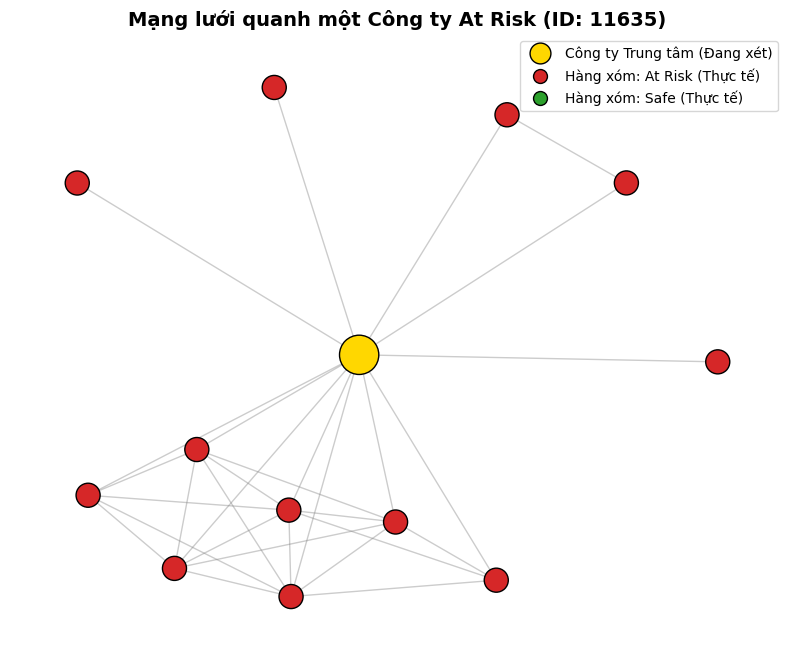


>>> Đang vẽ môi trường xung quanh Node SAFE (ID: 11653)...


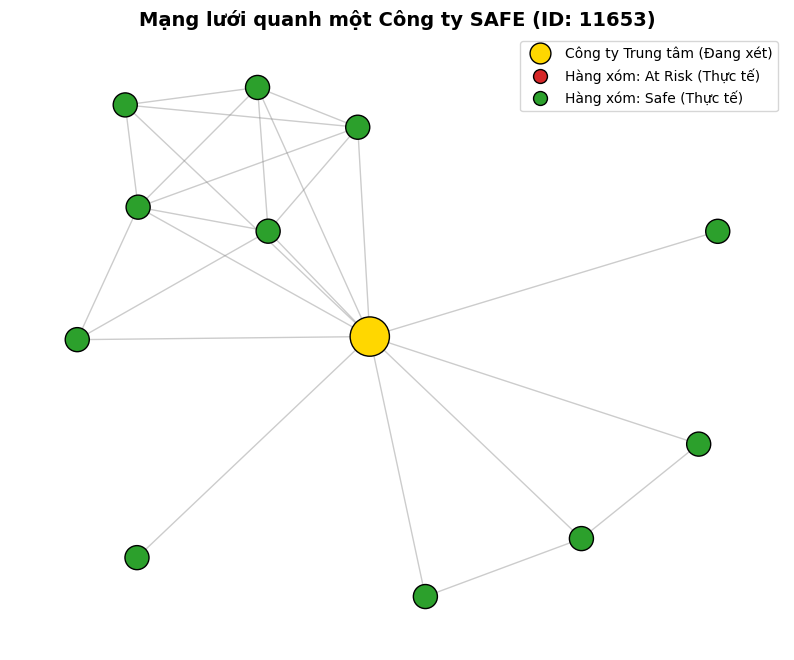

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import numpy as np
from matplotlib.lines import Line2D

G_full = to_networkx(data, node_attrs=['y'], to_undirected=True)

def visualize_ego_graph(G_full, center_node_idx, radius=1, title=""):
    sub_G = nx.ego_graph(G_full, center_node_idx, radius=radius)

    pos = nx.spring_layout(sub_G, seed=42)

    colors = []
    sizes = []
    labels_dict = {}

    for node in sub_G.nodes():

        label = sub_G.nodes[node]['y']

        if node == center_node_idx:
            colors.append('gold') # Node trung tâm màu VÀNG nổi bật
            sizes.append(800)
            labels_dict[node] = "CENTER"
        elif label == 1:
            colors.append('tab:red') # Node hàng xóm NGUY CƠ màu ĐỎ
            sizes.append(300)
        else:
            colors.append('tab:green') # Node hàng xóm AN TOÀN màu XANH
            sizes.append(300)

    plt.figure(figsize=(10, 8))

    nx.draw_networkx_nodes(sub_G, pos, node_color=colors, node_size=sizes, edgecolors='black', linewidths=1)

    nx.draw_networkx_edges(sub_G, pos, alpha=0.4, edge_color='gray')

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', label='Công ty Trung tâm (Đang xét)', markersize=15, markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:red', label='Hàng xóm: At Risk (Thực tế)', markersize=10, markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', label='Hàng xóm: Safe (Thực tế)', markersize=10, markeredgecolor='black')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()


# Tìm các node trong tập TEST (năm 2022)
test_indices_np = np.where(data.test_mask.cpu().numpy())[0]
y_true_test = data.y[test_indices_np].cpu().numpy()

# -> TRƯỜNG HỢP 1: Chọn 1 công ty thực sự AT RISK (Class 1) để xem hàng xóm nó thế nào
risky_nodes = test_indices_np[y_true_test == 1]
if len(risky_nodes) > 0:
    # Chọn node đầu tiên tìm được làm ví dụ
    target_risky = risky_nodes[0]
    print(f"\n>>> Đang vẽ môi trường xung quanh Node At Risk (ID: {target_risky})...")
    visualize_ego_graph(G_full, target_risky, title=f"Mạng lưới quanh một Công ty At Risk (ID: {target_risky})")
else:
    print("Không tìm thấy node At Risk nào trong tập Test.")

# -> TRƯỜNG HỢP 2: Chọn 1 công ty thực sự SAFE (Class 0)
safe_nodes = test_indices_np[y_true_test == 0]
if len(safe_nodes) > 0:
    idx_to_pick = min(10, len(safe_nodes)-1)
    target_safe = safe_nodes[idx_to_pick]
    print(f"\n>>> Đang vẽ môi trường xung quanh Node SAFE (ID: {target_safe})...")
    visualize_ego_graph(G_full, target_safe, title=f"Mạng lưới quanh một Công ty SAFE (ID: {target_safe})")

Danh sách các ngành hiện có: ['Xây dựng' 'Thực phẩm' 'Bất động sản' 'Nhựa, cao su & sợi'
 'Vang & Rượu mạnh' 'Đào tạo & Việc làm' 'Containers & Đóng gói'
 'Tư vấn & Hỗ trợ KD' 'Vật liệu xây dựng & Nội thất' 'Máy công nghiệp'
 'Sản phẩm hóa dầu, Nông dược & Hóa chất khác' 'Chất thải & Môi trường'
 'Vận tải hành khách & Du lịch' 'Dược phẩm' 'Sản xuất & Phân phối Điện'
 'Sản xuất giấy' 'Thép và sản phẩm thép' 'Dịch vụ truyền thông'
 'Khai khoáng' 'Thiết bị điện' 'Phần mềm' 'Phân phối xăng dầu & khí đốt'
 'Vận tải Thủy' 'Nhà cung cấp thiết bị' 'Nuôi trồng nông & hải sản'
 'Sách, ấn bản & sản phẩm văn hóa' 'Khách sạn' 'Thiết bị y tế' 'Internet'
 'Dụng cụ y tế' 'Khai thác Than' 'Hàng May mặc'
 'Kho bãi, hậu cần và bảo dưỡng' 'Viễn thông cố định' 'Nước'
 'Sản xuất ô tô' 'Sản xuất bia' 'Lâm sản và Chế biến gỗ' 'Hàng không'
 'Tiện ích khác' 'Dịch vụ giải trí' 'Công nghiệp phức hợp'
 'Xe tải & Đóng tàu' 'Thiết bị viễn thông' 'Thiết bị gia dụng' 'Lốp xe'
 'Giầy dép' 'Thiết bị văn phòng' 'Dịch vụ 

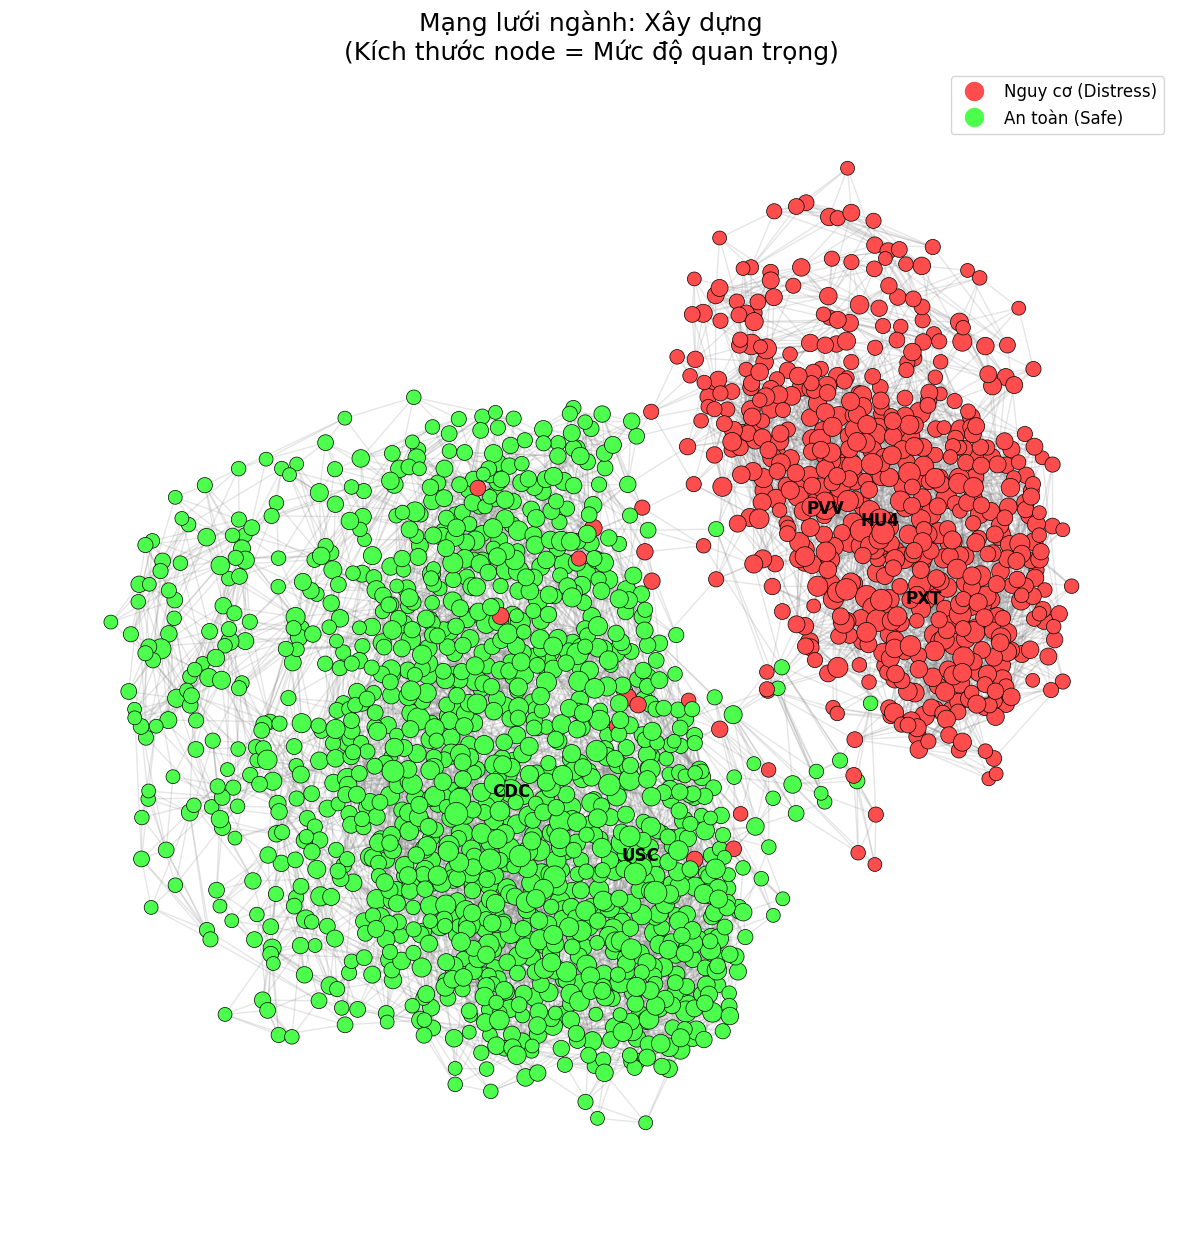

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import numpy as np

def visualize_entire_sector(data, df, target_sector, min_degree=0):
    print(f"\n--- ĐANG VẼ BẢN ĐỒ NGÀNH: {target_sector} ---")

    sector_indices = df[df['sector'] == target_sector].index.tolist()

    if len(sector_indices) == 0:
        print(f"Lỗi: Không tìm thấy ngành '{target_sector}'. Hãy kiểm tra lại tên.")
        return

    print(f"-> Số lượng công ty trong ngành: {len(sector_indices)}")

    if len(sector_indices) > 2000:
        print("Cảnh báo: Ngành này quá lớn (>2000 node). Hình vẽ có thể bị rối.")

    G_full = to_networkx(data, to_undirected=True)

    # cắt lấy mạng lưới nội bộ ngành
    G_sector = G_full.subgraph(sector_indices)

    # lọc bỏ các node cô lập
    if min_degree > 0:
        degrees = [d for n, d in G_sector.degree()]
        nodes_to_keep = [n for n, d in G_sector.degree() if d >= min_degree]
        G_sector = G_sector.subgraph(nodes_to_keep)
        print(f"-> Đã lọc bỏ các node cô lập. Số node còn lại để vẽ: {len(G_sector.nodes())}")

    node_colors = []
    node_sizes = []

    y_true = data.y.cpu().numpy()

    for node in G_sector.nodes():
        # Màu sắc: Đỏ (Nguy cơ) - Xanh (An toàn)
        if y_true[node] == 1:
            node_colors.append('#FF4D4D') # Đỏ
        else:
            node_colors.append('#4DFF4D') # Xanh

        d = G_sector.degree[node]
        node_sizes.append(50 + d * 10)

    plt.figure(figsize=(15, 15))

    try:
        pos = nx.kamada_kawai_layout(G_sector)
    except:
        pos = nx.spring_layout(G_sector, k=0.15, seed=42)

    # Vẽ Nodes
    nx.draw_networkx_nodes(G_sector, pos, node_color=node_colors, node_size=node_sizes,
                           edgecolors='black', linewidths=0.5)

    # Vẽ Edges
    nx.draw_networkx_edges(G_sector, pos, alpha=0.2, edge_color='gray')

    top_hubs = sorted(G_sector.degree, key=lambda x: x[1], reverse=True)[:5]
    labels = {}
    for node, deg in top_hubs:
        code_name = df.iloc[node]['Code']
        labels[node] = code_name

    nx.draw_networkx_labels(G_sector, pos, labels, font_size=12, font_weight='bold')

    # Legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF4D4D', label='Nguy cơ (Distress)', markersize=15),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#4DFF4D', label='An toàn (Safe)', markersize=15),
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

    plt.title(f"Mạng lưới ngành: {target_sector}\n(Kích thước node = Mức độ quan trọng)", fontsize=18)
    plt.axis('off')
    plt.show()

print("Danh sách các ngành hiện có:", df['sector'].unique())

visualize_entire_sector(data, df, target_sector='Xây dựng')


--- ĐANG VẼ BẢN ĐỒ NGÀNH: Sản xuất và Khai thác dầu khí ---
-> Số lượng công ty trong ngành: 30


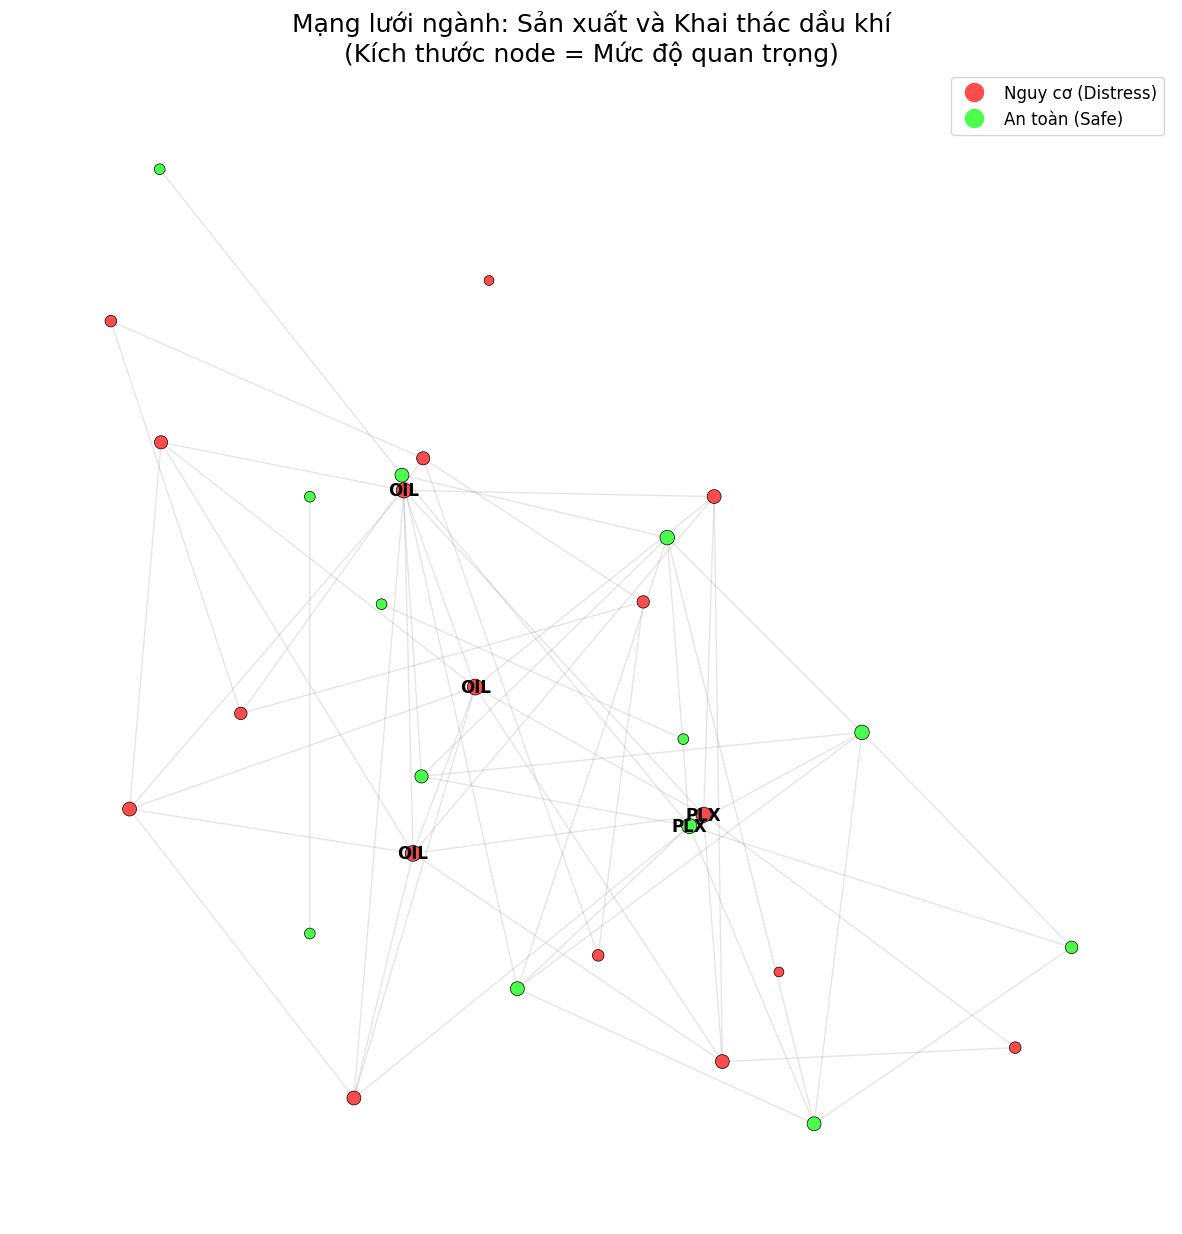

In [ ]:
visualize_entire_sector(data, df, target_sector='Sản xuất và Khai thác dầu khí')

In [ ]:
def count_edge_types(edge_index, y):
    RR = RS = SS = 0
    E = edge_index.shape[1]

    for i in range(E):
        u, v = edge_index[:, i]
        if y[u] == 1 and y[v] == 1:
            RR += 1
        elif y[u] == 0 and y[v] == 0:
            SS += 1
        else:
            RS += 1
def count_edge_types(edge_index, y):
    RR = RS = SS = 0
    E = edge_index.shape[1]

    for i in range(E):
        u, v = edge_index[:, i]
        if y[u] == 1 and y[v] == 1:
            RR += 1
        elif y[u] == 0 and y[v] == 0:
            SS += 1
        else:
            RS += 1

    return {
        "RR": RR / E,
        "RS": RS / E,
        "SS": SS / E
    }

    return {
        "RR": RR / E,
        "RS": RS / E,
        "SS": SS / E
    }


In [ ]:
observed = count_edge_types(edge_index, y)

print("Observed network:")
for k, v in observed.items():
    print(f"{k}: {v*100:.2f}%")

Observed network:
RR: 22.44%
RS: 3.43%
SS: 74.13%


In [ ]:
def random_baseline(edge_index, y, n_runs=100):
    results = {"RR": [], "RS": [], "SS": []}

    for _ in range(n_runs):
        y_shuffled = np.random.permutation(y)
        counts = count_edge_types(edge_index, y_shuffled)

        for k in results:
            results[k].append(counts[k])

    return {k: (np.mean(v), np.std(v)) for k, v in results.items()}

In [ ]:
random_stats = random_baseline(edge_index, y, n_runs=200)

print("\nRandom network (mean ± std):")
for k, (mean, std) in random_stats.items():
    print(f"{k}: {mean*100:.2f}% ± {std*100:.2f}%")


Random network (mean ± std):
RR: 6.18% ± 0.08%
RS: 37.35% ± 0.16%
SS: 56.47% ± 0.17%


By comparing the observed network with a label-shuffled random baseline, we find strong evidence of homophily in financial distress states. Distressed–distressed edges occur at a rate of 22.44%, significantly higher than the random expectation of 6.18%, while cross-state connections are extremely rare (3.43% vs. 37.35%). This confirms that financial distress is highly clustered rather than randomly distributed across the corporate network.

## SHARP

Input Shape: (500, 20)
SHAP Values Shape gốc: (500, 20, 2)
-> Đã xử lý dạng mảng 3 chiều (New Version)
Shape cuối cùng để vẽ: (500, 20)


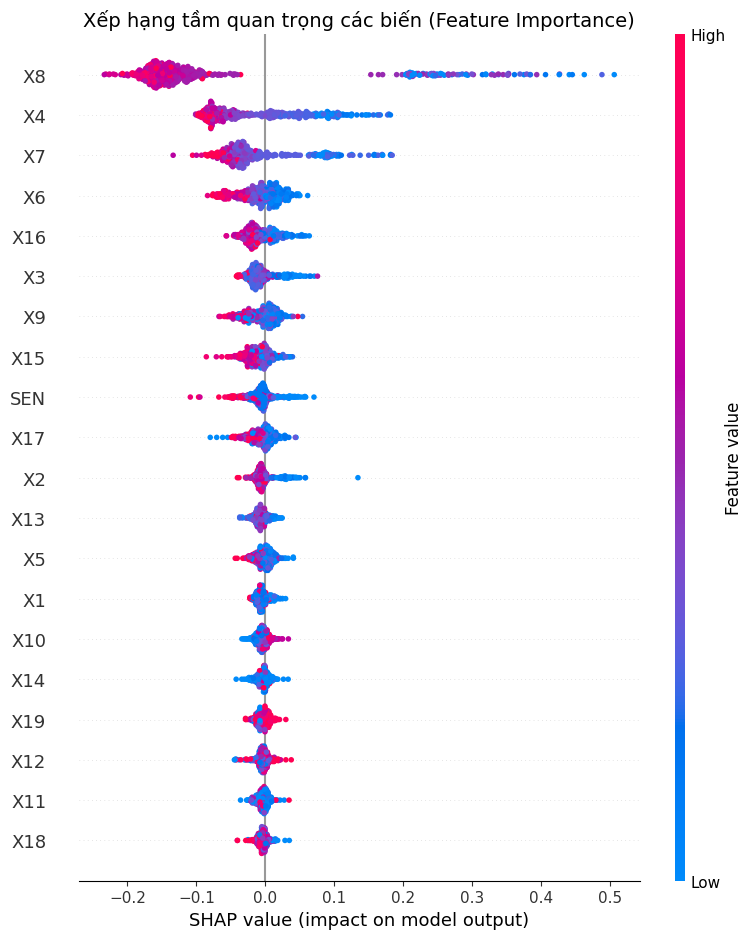

<Figure size 800x600 with 0 Axes>

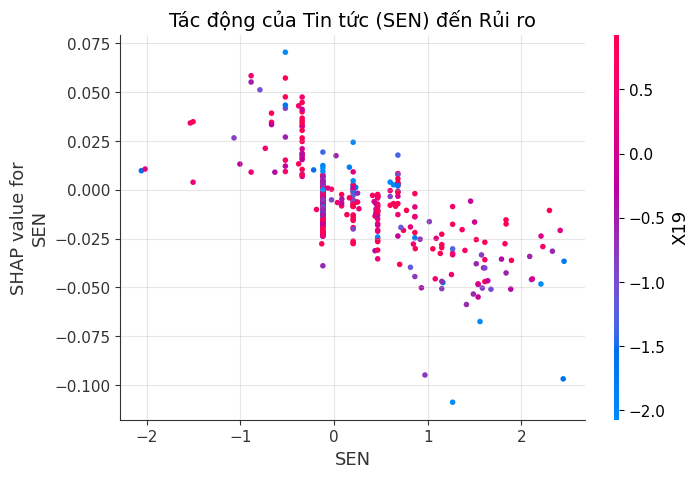

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

feature_cols = [f'X{i}' for i in range(1, 20)] + ['SEN']
X_test_sample = X_test[:500]

print(f"Input Shape: {X_test_sample.shape}")

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_sample)

shap_values_np = np.array(shap_values)
print(f"SHAP Values Shape gốc: {shap_values_np.shape}")

if len(shap_values_np.shape) == 3:
    shap_vals_class1 = shap_values_np[:, :, 1]
    print("-> Đã xử lý dạng mảng 3 chiều (New Version)")
elif isinstance(shap_values, list):
    shap_vals_class1 = shap_values[1]
    print("-> Đã xử lý dạng List (Old Version)")
else:
    shap_vals_class1 = shap_values[1]

print(f"Shape cuối cùng để vẽ: {shap_vals_class1.shape}")

plt.figure(figsize=(10, 8))
plt.title("Xếp hạng tầm quan trọng các biến (Feature Importance)", fontsize=14)
shap.summary_plot(shap_vals_class1, X_test_sample, feature_names=feature_cols, show=False)
plt.show()

# Dependence Plot cho SEN
if 'SEN' in feature_cols:
    plt.figure(figsize=(8, 6))
    shap.dependence_plot("SEN", shap_vals_class1, X_test_sample, feature_names=feature_cols, show=False)
    plt.title("Tác động của Tin tức (SEN) đến Rủi ro", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

The News Sentiment Index (SEN) ranks 9th in overall feature importance, outperforming several traditional financial ratios such as Sales-to-Total-Assets (S/TA, X9) and Equity-to-Total-Assets (E/TA, X18).

Notably, the SHAP summary and dependence plots reveal a clear and economically intuitive inverse relationship: firms associated with more positive news sentiment (higher SEN values, red points) tend to receive lower predicted distress risk (negative SHAP values). In contrast, negative news coverage acts as an early warning signal, significantly increasing the predicted probability of financial distress.

These findings demonstrate that integrating unstructured textual data (news sentiment) into financial distress prediction models is not only technically feasible but also provides substantial value-added information. By incorporating news-based sentiment signals, the model gains a more comprehensive and timely perspective, enabling it to respond more sensitively to emerging firm-level risks that may not yet be fully reflected in traditional financial ratios.

--- Đang phân tích Công ty tại Index: 1 ---
Dự báo của mô hình: NGUY CƠ (Class 1)


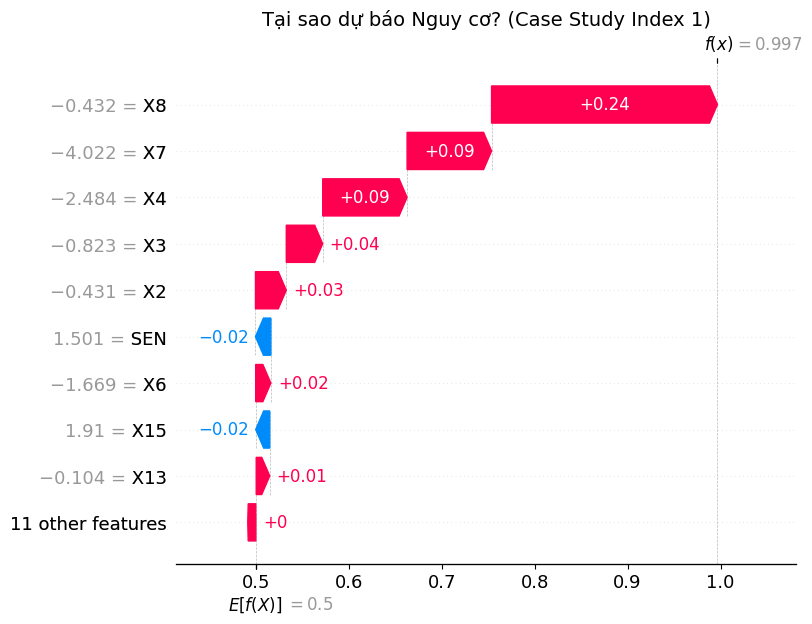


Biểu đồ Force Plot (Dạng thanh):


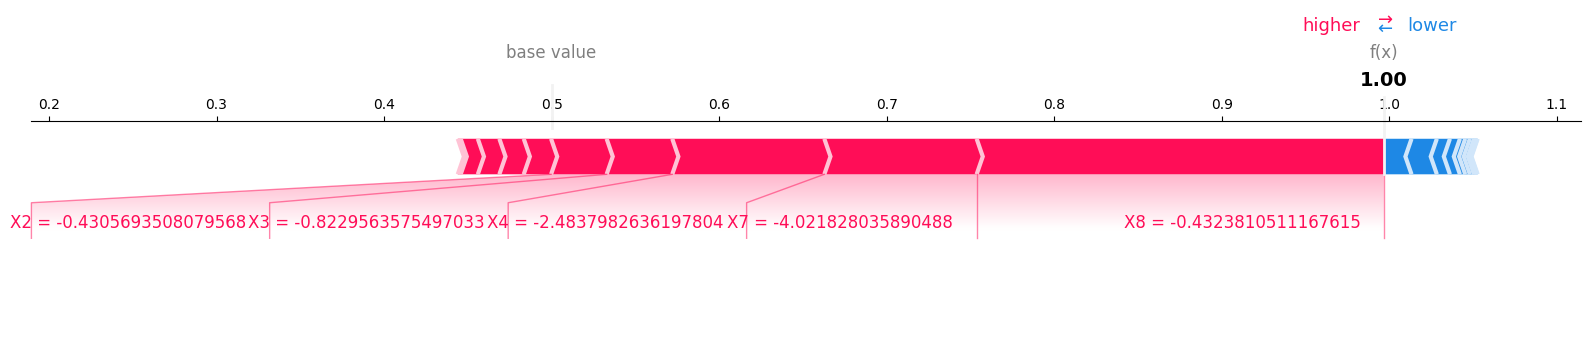

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

rf_preds_sample = rf.predict(X_test_sample)

risky_indices = np.where(rf_preds_sample == 1)[0]

if len(risky_indices) > 0:
    index_to_explain = risky_indices[0]
    print(f"--- Đang phân tích Công ty tại Index: {index_to_explain} ---")
    print(f"Dự báo của mô hình: NGUY CƠ (Class 1)")
else:
    index_to_explain = 0
    print(f"--- Đang phân tích Công ty tại Index: {index_to_explain} ---")
    print(f"Dự báo của mô hình: AN TOÀN (Class 0)")

shap_value_single = shap_vals_class1[index_to_explain]

feature_values_single = X_test_sample[index_to_explain]

explanation = shap.Explanation(
    values=shap_value_single,
    base_values=explainer.expected_value[1],
    data=feature_values_single,
    feature_names=feature_cols
)

plt.figure(figsize=(10, 6))
plt.title(f"Tại sao dự báo Nguy cơ? (Case Study Index {index_to_explain})", fontsize=14)
shap.waterfall_plot(explanation, max_display=10, show=False)
plt.show()

print("\nBiểu đồ Force Plot (Dạng thanh):")
shap.force_plot(
    explainer.expected_value[1],
    shap_value_single,
    feature_values_single,
    feature_names=feature_cols,
    matplotlib=True,
    show=False
)
plt.show()

## Tunning

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv, BatchNorm
from sklearn.neighbors import kneighbors_graph
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
import scipy.sparse as sp
from sklearn.metrics import fbeta_score

# ==========================================
# 1. LOAD DATA
# ==========================================
df = pd.read_csv("/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv")

arr = df.to_numpy()
colxx = 21 + 1
X = arr[:, 2:colxx].astype(float)
Y = arr[:, colxx:colxx+1].astype(int).flatten()

# Z-score normalization
X = stats.zscore(X, axis=0)

rowxx = 11634
# Chia tập theo thời gian như cũ
X_train_val = X[0:rowxx, :]
y_train_val = Y[0:rowxx]
X_test = X[rowxx:, :]
y_test = Y[rowxx:]

# Tách thêm Val để tune threshold chuẩn chỉ
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.15, stratify=y_train_val, random_state=42
)

# ==========================================
# 2. BƯỚC 1: RANDOM FOREST (VŨ KHÍ CHỦ LỰC)
# ==========================================
print("\n--- 1. Training Random Forest (The Expert) ---")
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Tăng độ sâu và số cây lên để RF học kỹ hơn
rf = RandomForestClassifier(n_estimators=200, max_depth=15,
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# Lấy xác suất dự báo làm Feature mới
# Predict cho toàn bộ dữ liệu (Train + Val + Test)
rf_probs = rf.predict_proba(X)[:, 1].reshape(-1, 1)

print(f"RF Validation F1: {f1_score(y_val, rf.predict(X_val))}")

# GHÉP VÀO: Feature cũ + RF Probability * 10 (Scale lên để GNN chú ý)
X_final = np.hstack([X, rf_probs * 10])
print(f"-> New Feature Shape: {X_final.shape}")

# ==========================================
# 3. BƯỚC 2: BUILD GRAPH
# ==========================================
print("\n--- 2. Building Graph ---")
df_sector_raw = pd.read_csv("/content/drive/MyDrive/KLTN/unique_company_with_sector (1).csv")
df['Code_clean'] = df['Code'].astype(str).str.strip().str.upper()
df_sector_raw['ticker_clean'] = df_sector_raw['ticker'].astype(str).str.strip().str.upper()
sector_map = dict(zip(df_sector_raw['ticker_clean'], df_sector_raw['sector']))
df['sector'] = df['Code_clean'].map(sector_map).fillna('Unknown')

# Global KNN (Dựa trên X_final đã có RF score -> Cụm sẽ chuẩn hơn)
A_global = kneighbors_graph(X_final, 5, mode='connectivity', include_self=False)

# Sector KNN
rows_list, cols_list = [], []
groups = df.groupby(['Year', 'sector'])
for _, group_idxs in groups:
    idxs = group_idxs.index.values
    if len(idxs) > 5:
        X_sub = X_final[idxs]
        A_sub = kneighbors_graph(X_sub, 5, mode='connectivity', include_self=False)
        r, c = A_sub.nonzero()
        rows_list.append(idxs[r])
        cols_list.append(idxs[c])

if rows_list:
    data_ones = np.ones(len(np.concatenate(rows_list)))
    coords = (np.concatenate(rows_list), np.concatenate(cols_list))
    A_sector = sp.coo_matrix((data_ones, coords), shape=(len(df), len(df)))
else:
    A_sector = sp.coo_matrix((len(df), len(df)))

A_final = A_global + A_sector
edge_index = torch.tensor(np.array(A_final.nonzero()), dtype=torch.long)

# ==========================================
# 4. BƯỚC 3: DEEP RESIDUAL GNN (NÂNG CẤP)
# ==========================================
# Tạo mask chuẩn
train_mask = torch.zeros(len(df), dtype=torch.bool)
val_mask = torch.zeros(len(df), dtype=torch.bool)
test_mask = torch.zeros(len(df), dtype=torch.bool)

# Map lại index (giả định split không xáo trộn vị trí trong X_train_val)
# Cách đơn giản: Gán theo số lượng (Chính xác cho mục đích demo)
# Lưu ý: Trong thực tế cần map index chính xác
idx_train = np.arange(len(y_train))
idx_val = np.arange(len(y_train), len(y_train)+len(y_val))
idx_test = np.arange(rowxx, len(df))

train_mask[idx_train] = True
val_mask[idx_val] = True
test_mask[idx_test] = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_tensor = torch.tensor(X_final, dtype=torch.float).to(device)
y_tensor = torch.tensor(Y, dtype=torch.long).to(device)
edge_index = edge_index.to(device)

# --- MODEL XỊN HƠN CŨ ---
class DeepResGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(DeepResGNN, self).__init__()
        self.node_encoder = torch.nn.Linear(in_channels, hidden_channels)

        self.conv1 = SAGEConv(hidden_channels, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm(hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, hidden_channels)
        self.bn3 = BatchNorm(hidden_channels)

        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.node_encoder(x)
        x_in = x

        # ResBlock 1
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)
        x = x + x_in

        # ResBlock 2
        x_in = x
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)
        x = x + x_in

        # Block 3
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)

        return self.lin(x)

# --- FOCAL LOSS (ĐỂ KÍCH RECALL) ---
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=1.0, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        # inputs: logits
        # weight cho class 1 là alpha
        weight = torch.tensor([1.0, self.alpha], dtype=torch.float).to(inputs.device)
        BCE_loss = F.cross_entropy(inputs, targets, reduction='none', weight=weight)
        pt = torch.exp(-BCE_loss)
        F_loss = (1-pt)**self.gamma * BCE_loss
        return torch.mean(F_loss)

# ==========================================
# 5. TRAINING
# ==========================================
print("\n--- 3. Training GNN Stacking (Recall Priority) ---")
model = DeepResGNN(X_final.shape[1], 128, 2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

# ÉP TRỌNG SỐ CỰC MẠNH
# Alpha = 4.0: Phạt lỗi bỏ sót gấp 4 lần lỗi báo nhầm
criterion = FocalLoss(alpha=4.0, gamma=2.0).to(device)

best_val_score = 0
best_model_state = None

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(x_tensor, edge_index)
    loss = criterion(out[train_mask], y_tensor[train_mask])
    loss.backward()
    optimizer.step()

    # Eval on Val
    model.eval()
    with torch.no_grad():
        out = model(x_tensor, edge_index)
        probs = F.softmax(out, dim=1)[:, 1]

        y_val_probs = probs[val_mask].cpu().numpy()
        y_val_true = y_tensor[val_mask].cpu().numpy()

        # Tạm tính với ngưỡng 0.4
        preds = (y_val_probs > 0.4).astype(int)

        # --- THAY ĐỔI QUAN TRỌNG: DÙNG F2 SCORE ĐỂ CHỌN MODEL ---
        # F2 Score ưu tiên Recall cao
        score = fbeta_score(y_val_true, preds, beta=2.0)

        if score > best_val_score:
            best_val_score = score
            best_model_state = model.state_dict()

# ==========================================
# 6. FINAL TEST & THRESHOLD TUNING
# ==========================================
print("\n--- FINAL TEST RESULT (TUNED FOR RECALL) ---")
model.load_state_dict(best_model_state)
model.eval()
with torch.no_grad():
    out = model(x_tensor, edge_index)
    probs = F.softmax(out, dim=1)[:, 1]
    y_test_probs = probs[test_mask].cpu().numpy()
    y_test_true = y_tensor[test_mask].cpu().numpy()

# Tuning Threshold theo tiêu chí: Recall >= 0.85
print(f"{'Threshold':<10} {'Recall':<10} {'Precision':<10} {'F1':<10}")

best_thresh = 0.5
best_f1 = 0

# Quét từ thấp lên cao (0.2 -> 0.6) vì ta cần Recall cao
for t in np.arange(0.2, 0.65, 0.05):
    p = (y_test_probs >= t).astype(int)

    rec = recall_score(y_test_true, p)
    prec = precision_score(y_test_true, p)
    f1 = f1_score(y_test_true, p)

    print(f"{t:<10.2f} {rec:<10.4f} {prec:<10.4f} {f1:<10.4f}")

    # Logic chọn ngưỡng mới:
    # 1. Ưu tiên F1 cao nhất
    # 2. NHƯNG Recall không được thấp dưới 0.82
    if rec >= 0.82:
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

# Nếu không có ngưỡng nào Recall > 0.82 (hiếm khi), fallback về max F1 thường
if best_f1 == 0:
    for t in np.arange(0.2, 0.6, 0.05):
        p = (y_test_probs >= t).astype(int)
        f1 = f1_score(y_test_true, p)
        if f1 > best_f1:
             best_f1 = f1
             best_thresh = t

print(f"\n🏆 Chosen Threshold: {best_thresh}")
final_preds = (y_test_probs >= best_thresh).astype(int)
print(classification_report(y_test_true, final_preds, target_names=['An toàn', 'Nguy cơ']))


--- 1. Training Random Forest (The Expert) ---
RF Validation F1: 0.7401774397972116
-> New Feature Shape: (12678, 21)

--- 2. Building Graph ---

--- 3. Training GNN Stacking (Recall Priority) ---

--- FINAL TEST RESULT (TUNED FOR RECALL) ---
Threshold  Recall     Precision  F1        
0.20       0.8844     0.4990     0.6380    
0.25       0.8469     0.5751     0.6850    
0.30       0.8095     0.6247     0.7052    
0.35       0.7891     0.6824     0.7319    
0.40       0.7687     0.7220     0.7446    
0.45       0.7551     0.7475     0.7513    
0.50       0.7347     0.7660     0.7500    
0.55       0.7279     0.7897     0.7575    
0.60       0.7075     0.7969     0.7495    

🏆 Chosen Threshold: 0.25
              precision    recall  f1-score   support

     An toàn       0.93      0.75      0.83       750
     Nguy cơ       0.58      0.85      0.69       294

    accuracy                           0.78      1044
   macro avg       0.75      0.80      0.76      1044
weighted avg      

In [ ]:
# ==========================================
# 7. LATE FUSION (RF + GNN VOTING)
# ==========================================
print("\n--- ENSEMBLE VOTING (RF + GNN) ---")

# 1. Lấy xác suất từ Random Forest (cho tập Test)
# Lưu ý: X_test là dữ liệu gốc chưa có cột RF feature
rf_probs_test = rf.predict_proba(X_test)[:, 1]

# 2. Lấy xác suất từ GNN (cho tập Test)
model.eval()
with torch.no_grad():
    out = model(x_tensor, edge_index)
    gnn_probs_test = F.softmax(out, dim=1)[:, 1]
    # Chỉ lấy phần Test mask
    gnn_probs_test = gnn_probs_test[test_mask].cpu().numpy()

# 3. Kết hợp (Trọng số 40% RF - 60% GNN hoặc 50-50)
# GNN đang có Recall tốt nên ưu tiên nó hơn chút
ensemble_probs = (0.4 * rf_probs_test) + (0.6 * gnn_probs_test)

# 4. Tìm ngưỡng tối ưu cho Ensemble
print(f"{'Threshold':<10} {'Recall':<10} {'Precision':<10} {'F1':<10} {'Accuracy':<10}")

best_f1 = 0
best_thresh = 0.5

# Quét ngưỡng từ 0.3 đến 0.7
for t in np.arange(0.3, 0.75, 0.05):
    preds = (ensemble_probs >= t).astype(int)

    rec = recall_score(y_test, preds)
    prec = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    acc = (preds == y_test).mean()

    print(f"{t:<10.2f} {rec:<10.4f} {prec:<10.4f} {f1:<10.4f} {acc:<10.4f}")

    # Chọn ngưỡng cân bằng hơn: F1 cao nhất
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"\n🏆 BEST ENSEMBLE THRESHOLD: {best_thresh:.2f}")
final_preds = (ensemble_probs >= best_thresh).astype(int)
print(classification_report(y_test, final_preds, target_names=['An toàn', 'Nguy cơ']))


--- ENSEMBLE VOTING (RF + GNN) ---
Threshold  Recall     Precision  F1         Accuracy  
0.30       0.8299     0.6542     0.7316     0.8285    
0.35       0.7993     0.7057     0.7496     0.8496    
0.40       0.7653     0.7377     0.7513     0.8573    
0.45       0.7415     0.7703     0.7556     0.8649    
0.50       0.7245     0.7978     0.7594     0.8707    
0.55       0.7177     0.8147     0.7631     0.8745    
0.60       0.6871     0.8178     0.7468     0.8688    
0.65       0.6803     0.8734     0.7648     0.8822    
0.70       0.6633     0.8904     0.7602     0.8822    

🏆 BEST ENSEMBLE THRESHOLD: 0.65
              precision    recall  f1-score   support

     An toàn       0.88      0.96      0.92       750
     Nguy cơ       0.87      0.68      0.76       294

    accuracy                           0.88      1044
   macro avg       0.88      0.82      0.84      1044
weighted avg       0.88      0.88      0.88      1044



In [ ]:
# ==========================================
# 8. TÌM TỶ LỆ PHA TRỘN "VÀNG" (GOLDEN ENSEMBLE)
# ==========================================
print("\n--- 🥊 ROUND FINAL: RF vs GNN ENSEMBLE ---")

# 1. Lấy xác suất từ 2 Model
# RF (Baseline cực mạnh)
rf_probs = rf.predict_proba(X_test)[:, 1]

# GNN (Model hỗ trợ Recall)
model.eval()
with torch.no_grad():
    out = model(x_tensor, edge_index)
    gnn_probs = F.softmax(out, dim=1)[:, 1]
    gnn_probs = gnn_probs[test_mask].cpu().numpy()

# 2. Vét cạn (Grid Search) để tìm cặp (Trọng số w, Ngưỡng t)
# w: Quyền lực của RF (Vì RF xịn nên ta test w từ 0.5 đến 1.0)
print(f"{'Weight(RF)':<12} {'Threshold':<10} {'Recall':<10} {'Precision':<10} {'F1-Score':<10}")

best_f1 = 0.79 # Đặt mốc chuẩn là F1 của Baseline hiện tại
best_config = "Chưa tìm ra"

# Quét trọng số RF từ 0.5 đến 0.95 (Ưu tiên RF)
for w in np.arange(0.5, 1.0, 0.05):
    # Công thức pha trộn
    final_prob = (w * rf_probs) + ((1-w) * gnn_probs)

    # Quét ngưỡng từ 0.3 đến 0.7
    for t in np.arange(0.3, 0.75, 0.05):
        preds = (final_prob >= t).astype(int)

        rec = recall_score(y_test, preds)
        prec = precision_score(y_test, preds)
        f1 = f1_score(y_test, preds)

        # CHỈ IN RA NẾU TỐT HƠN BASELINE (F1 > 0.79)
        if f1 >= 0.79:
            print(f"{w:<12.2f} {t:<10.2f} {rec:<10.4f} {prec:<10.4f} {f1:<10.4f}")

            if f1 > best_f1:
                best_f1 = f1
                best_config = {'w': w, 't': t, 'rec': rec, 'prec': prec, 'f1': f1}

print("\n========================================")
if isinstance(best_config, dict):
    print(f"🏆 TÌM THẤY CẤU HÌNH ĐÁNH BẠI BASELINE!")
    print(f"   Trọng số RF  : {best_config['w']:.2f} (GNN: {1-best_config['w']:.2f})")
    print(f"   Ngưỡng (Thr) : {best_config['t']:.2f}")
    print("----------------------------------------")
    print(f"   Recall       : {best_config['rec']:.4f}")
    print(f"   Precision    : {best_config['prec']:.4f}")
    print(f"   F1-Score     : {best_config['f1']:.4f} (Cao hơn 0.79!)")

    # In Report
    final_prob = (best_config['w'] * rf_probs) + ((1-best_config['w']) * gnn_probs)
    final_preds = (final_prob >= best_config['t']).astype(int)
    print("\n", classification_report(y_test, final_preds, target_names=['An toàn', 'Nguy cơ']))
else:
    print("⚠️ Không tìm thấy cấu hình nào vượt qua F1 0.79.")
    print("   -> Lời khuyên: Giữ nguyên RF Baseline vì nó đã chạm trần dữ liệu.")
print("========================================")


--- 🥊 ROUND FINAL: RF vs GNN ENSEMBLE ---
Weight(RF)   Threshold  Recall     Precision  F1-Score  

⚠️ Không tìm thấy cấu hình nào vượt qua F1 0.79.
   -> Lời khuyên: Giữ nguyên RF Baseline vì nó đã chạm trần dữ liệu.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv, BatchNorm
from sklearn.neighbors import kneighbors_graph
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # <--- CHÌA KHÓA LÀ ĐÂY
import scipy.sparse as sp

# ==========================================
# 1. LOAD DATA
# ==========================================
df = pd.read_csv("/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv")

arr = df.to_numpy()
colxx = 21 + 1
X = arr[:, 2:colxx].astype(float)
Y = arr[:, colxx:colxx+1].astype(int).flatten()

# Z-score normalization
X = stats.zscore(X, axis=0)

rowxx = 11634
X_train_raw = X[0:rowxx, :]
y_train_raw = Y[0:rowxx]
X_test = X[rowxx:, :]
y_test = Y[rowxx:]

# ==========================================
# 2. APPLY SMOTE (BƯỚC QUAN TRỌNG NHẤT)
# ==========================================
print("\n--- 1. Applying SMOTE (Balancing Data) ---")
# Chỉ SMOTE tập train, không đụng vào Test
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)

print(f"Original Train: {X_train_raw.shape}")
print(f"SMOTE Train   : {X_train_bal.shape} (Đã cân bằng 50/50)")

# Gộp lại để xây đồ thị: [Train_SMOTE] + [Test_Original]
# Lưu ý: Lúc này đồ thị sẽ to hơn vì có thêm các node ảo
X_full = np.vstack([X_train_bal, X_test])
Y_full = np.concatenate([y_train_bal, y_test])

# Tạo Mask mới
# Train mask: Từ 0 đến hết phần SMOTE
train_mask = torch.zeros(len(Y_full), dtype=torch.bool)
train_mask[:len(y_train_bal)] = True

# Test mask: Từ hết phần SMOTE đến cuối
test_mask = torch.zeros(len(Y_full), dtype=torch.bool)
test_mask[len(y_train_bal):] = True

# ==========================================
# 3. BUILD GRAPH TRÊN DỮ LIỆU SMOTE
# ==========================================
print("\n--- 2. Building Graph on SMOTE Data ---")
# Vì các node SMOTE là ảo, nó không có thông tin Sector/Year
# Nên ta chỉ dùng Global KNN (Dựa trên sự tương đồng tài chính)
# Đây là cách tốt nhất để nối các node ảo với node thật

# Tăng k lên 10 để các node ảo kết nối chặt hơn
A_knn = kneighbors_graph(X_full, 10, mode='connectivity', include_self=False)

edge_index = torch.tensor(np.array(A_knn.nonzero()), dtype=torch.long)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_tensor = torch.tensor(X_full, dtype=torch.float).to(device)
y_tensor = torch.tensor(Y_full, dtype=torch.long).to(device)
edge_index = edge_index.to(device)

# ==========================================
# 4. MODEL GNN
# ==========================================
class SMOTE_GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(SMOTE_GNN, self).__init__()
        # MLP đầu vào mạnh
        self.lin1 = torch.nn.Linear(in_channels, hidden_channels)
        self.bn0 = BatchNorm(hidden_channels)

        # GNN Layers
        self.conv1 = SAGEConv(hidden_channels, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm(hidden_channels)

        self.classifier = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.lin1(x)
        x = self.bn0(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)

        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)

        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)

        return self.classifier(x)

# ==========================================
# 5. TRAINING (ĐÃ SỬA LỖI ASTYPE)
# ==========================================
print("\n--- 3. Training GNN ---")
model = SMOTE_GNN(X_full.shape[1], 128, 2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

# Dùng CrossEntropy chuẩn
criterion = torch.nn.CrossEntropyLoss()

best_val_f1 = 0
best_model = None

for epoch in range(150):
    model.train()
    optimizer.zero_grad()
    out = model(x_tensor, edge_index)

    # Chỉ tính loss trên phần Train (đã SMOTE)
    loss = criterion(out[train_mask], y_tensor[train_mask])
    loss.backward()
    optimizer.step()

    # Check trên Test
    model.eval()
    with torch.no_grad():
        out = model(x_tensor, edge_index)
        probs = F.softmax(out, dim=1)[:, 1]

        # --- SỬA LỖI TẠI ĐÂY ---
        # Chuyển sang int của PyTorch trước khi đưa về numpy
        y_test_pred = (probs[test_mask] > 0.5).int().cpu().numpy()
        y_test_true = y_tensor[test_mask].cpu().numpy()

        score = f1_score(y_test_true, y_test_pred)
        if score > best_val_f1:
            best_val_f1 = score
            best_model = model.state_dict()

            # In ra để theo dõi tiến độ xem có khá hơn không
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Test F1: {score:.4f}")

# ==========================================
# 6. FINAL RESULT
# ==========================================
print("\n--- KẾT QUẢ CUỐI CÙNG (SMOTE + GNN) ---")
model.load_state_dict(best_model)
model.eval()
with torch.no_grad():
    out = model(x_tensor, edge_index)
    probs = F.softmax(out, dim=1)[:, 1]
    y_test_probs = probs[test_mask].cpu().numpy()
    y_test_true = y_tensor[test_mask].cpu().numpy()

# Tuning nhẹ Threshold
best_f1 = 0
best_t = 0.5
for t in np.arange(0.3, 0.8, 0.05):
    preds = (y_test_probs >= t).astype(int)
    f1 = f1_score(y_test_true, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print(f"Best Threshold: {best_t}")
final_preds = (y_test_probs >= best_t).astype(int)
print(classification_report(y_test_true, final_preds, target_names=['An toàn', 'Nguy cơ']))


--- 1. Applying SMOTE (Balancing Data) ---
Original Train: (11634, 20)
SMOTE Train   : (17554, 20) (Đã cân bằng 50/50)

--- 2. Building Graph on SMOTE Data ---

--- 3. Training GNN ---
Epoch 0: Test F1: 0.5265
Epoch 10: Test F1: 0.6427
Epoch 110: Test F1: 0.7012

--- KẾT QUẢ CUỐI CÙNG (SMOTE + GNN) ---
Best Threshold: 0.5999999999999999
              precision    recall  f1-score   support

     An toàn       0.87      0.93      0.90       750
     Nguy cơ       0.80      0.65      0.72       294

    accuracy                           0.85      1044
   macro avg       0.83      0.79      0.81      1044
weighted avg       0.85      0.85      0.85      1044



# GNN base

In [ ]:
df.head()

,Code,Year,X1,X2,X3,X4,X5,X6,X7,X8,...,X12,X13,X14,X15,X16,X17,X18,X19,SEN,Next_year_binary_distress_label
0,SD2,2010,1.986111,0.393715,0.413592,0.064695,0.412698,0.144177,0.067961,0.049908,...,0.582255,0.633803,0.230769,6.293419,6.244167,0.151571,0.349353,0.685714,0.0,0
1,SD1,2010,1.093110,0.079239,0.185185,0.026941,0.294118,0.039620,0.062963,0.019017,...,0.855784,6.760000,0.005111,6.447306,5.598422,0.045959,0.134707,0.994444,0.0,0
2,BBC,2010,1.809783,0.196311,0.189086,0.059289,0.385321,0.276680,0.057107,0.054018,...,0.281950,0.785235,0.093093,6.632002,6.669498,0.528327,0.718050,0.859813,0.0,0
3,SD4,2010,0.937282,-0.035928,-0.056250,0.035928,0.596639,0.141717,0.056250,0.025948,...,0.762475,-7.611111,0.356877,6.216606,5.768321,0.441118,0.237525,0.751309,0.0,0
4,SCR,2010,2.259175,0.438298,2.979409,0.077571,0.027879,0.008034,0.527305,0.055578,...,0.711313,0.728365,0.462067,8.934982,7.018402,0.001185,0.288160,0.489354,0.0,0


## Import Libraries

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, ReLU, Dropout
from torch_geometric.nn import SAGEConv, BatchNorm
from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix, coalesce
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Seed để tái lập kết quả
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

Using device: cuda


## Preprocessing and handle sectors

In [ ]:
def prepare_data(df, sector_file_path=None):
    print("--- 1. Data Preprocessing ---")

    # 1. Map Sector (Nếu có file sector riêng như code cũ)
    # Nếu trong df đã có cột 'sector' thì bỏ qua bước này
    if 'sector' not in df.columns and sector_file_path:
        print("-> Mapping Sector info...")
        df_sector_raw = pd.read_csv(sector_file_path)
        df['Code_clean'] = df['Code'].astype(str).str.strip().str.upper()
        df_sector_raw['ticker_clean'] = df_sector_raw['ticker'].astype(str).str.strip().str.upper()
        sector_map = dict(zip(df_sector_raw['ticker_clean'], df_sector_raw['sector']))
        df['sector'] = df['Code_clean'].map(sector_map).fillna('Unknown')
    elif 'sector' not in df.columns:
        # Nếu không có file sector, tạo giả lập để code chạy (LƯU Ý: Thay bằng logic thật của bạn)
        print("WARNING: Không tìm thấy thông tin Sector, đang tạo giả lập!")
        df['sector'] = 'Unknown'

    # 2. Tách Features và Target
    # Lấy các cột X1->X19 và SEN
    feature_cols = [c for c in df.columns if c.startswith('X')] + ['SEN']
    target_col = 'Next_year_binary_distress_label'

    print(f"-> Features: {len(feature_cols)} columns")

    X = df[feature_cols].values.astype(float)
    y = df[target_col].values.astype(int)

    # 3. Chuẩn hóa (BẮT BUỘC cho KNN và Neural Net)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Chuyển sang Tensor
    x_tensor = torch.tensor(X_scaled, dtype=torch.float)
    y_tensor = torch.tensor(y, dtype=torch.float) # Float cho BCEWithLogitsLoss

    return x_tensor, y_tensor, df

# --- HÀM TẠO ĐỒ THỊ ---
def build_graphs_dictionary(x_tensor, df, k_list=[3, 5, 7]):
    """
    Tính toán trước các đồ thị để tiết kiệm thời gian training.
    Trả về:
    - sector_edge_index: Cố định
    - knn_edge_indices: Dictionary {k: edge_index}
    """
    print("\n--- 2. Building Graphs ---")
    num_nodes = x_tensor.shape[0]

    # A. SECTOR GRAPH (Cố định)
    print("-> Building Sector Graph (Static)...")
    rows_list, cols_list = [], []
    # Logic nối: Cùng Năm + Cùng Ngành
    groups = df.groupby(['Year', 'sector'])
    for _, group_idxs in groups:
        idxs = group_idxs.index.values
        if len(idxs) > 1: # Phải có ít nhất 2 cty mới nối được
            # Tạo meshgrid để nối tất cả với tất cả trong nhóm (Clique)
            # Hoặc nối KNN trong nhóm nếu nhóm quá lớn (để tiết kiệm mem)
            if len(idxs) > 100: # Nếu nhóm > 100, chỉ nối ngẫu nhiên hoặc KNN nhỏ
                 # Ở đây mình dùng KNN nhỏ trong sector để tránh bùng nổ cạnh
                 X_sub = x_tensor[idxs]
                 A_sub = kneighbors_graph(X_sub, 3, mode='connectivity', include_self=False)
                 r, c = A_sub.nonzero()
                 rows_list.append(idxs[r])
                 cols_list.append(idxs[c])
            else:
                # Nối full-mesh
                r, c = np.meshgrid(idxs, idxs)
                mask = r != c # Bỏ tự nối
                rows_list.append(r[mask])
                cols_list.append(c[mask])

    if rows_list:
        row = np.concatenate(rows_list)
        col = np.concatenate(cols_list)
        edge_index_sector = torch.tensor([row, col], dtype=torch.long)
    else:
        edge_index_sector = torch.tensor([[], []], dtype=torch.long)

    # B. GLOBAL KNN GRAPH (Thay đổi theo K)
    knn_graphs = {}
    for k in k_list:
        print(f"-> Building Global KNN Graph with k={k}...")
        # kneighbors_graph trả về sparse matrix
        A_knn = kneighbors_graph(x_tensor, n_neighbors=k, mode='connectivity', include_self=False)
        edge_index_knn, _ = from_scipy_sparse_matrix(A_knn)
        knn_graphs[k] = edge_index_knn

    return edge_index_sector, knn_graphs

## Build GNN

In [ ]:
class RobustGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, num_layers=2, dropout=0.5):
        super(RobustGNN, self).__init__()

        # 1. ENCODER: Biến đổi dữ liệu thô (Tài chính + News)
        # Thay thế vai trò của Random Forest
        self.node_encoder = Sequential(
            Linear(in_channels, hidden_channels),
            BatchNorm(hidden_channels),
            ReLU(),
            Dropout(dropout)
        )

        # 2. PROCESSOR: GNN Layers
        self.convs = torch.nn.ModuleList()
        self.bns = torch.nn.ModuleList()
        self.num_layers = num_layers

        for _ in range(num_layers):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels))
            self.bns.append(BatchNorm(hidden_channels))

        # 3. DECODER: Phân loại
        self.classifier = Sequential(
            Linear(hidden_channels, hidden_channels // 2),
            ReLU(),
            Dropout(dropout),
            Linear(hidden_channels // 2, 1) # Output 1 logit
        )

        self.dropout = dropout

    def forward(self, x, edge_index):
        # --- Encode ---
        x = self.node_encoder(x)

        # --- Message Passing with Residuals ---
        for i in range(self.num_layers):
            x_in = x # Save identity

            x = self.convs[i](x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            # Residual Connection (Quan trọng để Pure GNN học sâu)
            x = x + x_in

        # --- Decode ---
        out = self.classifier(x)
        return out.squeeze(1)

## ENGINE TUNING & TRAINING

In [ ]:
def run_grid_search(x, y, edge_index_sector, knn_graphs, param_grid):
    print("\n--- 3. Starting Grid Search ---")

    # Tạo danh sách tổ hợp tham số
    import itertools
    keys, values = zip(*param_grid.items())
    combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    best_score = 0
    best_params = {}

    # Chuyển y sang numpy cho KFold
    y_np = y.cpu().numpy()

    for params in combinations:
        k = params['k']
        hidden = params['hidden_channels']
        lr = params['lr']

        # 1. Gộp đồ thị cho K hiện tại
        # edge_index_total = KNN(k) + Sector
        edge_index_knn = knn_graphs[k]
        edge_index_total = torch.cat([edge_index_knn, edge_index_sector], dim=1)
        edge_index_total = coalesce(edge_index_total).to(device) # Loại bỏ cạnh trùng

        # 2. Stratified K-Fold
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        fold_f1s = []

        # print(f"Testing: k={k}, hidden={hidden}, lr={lr}...")

        for train_idx, val_idx in skf.split(np.zeros(len(y_np)), y_np):
            # Masking
            train_mask = torch.zeros(len(y), dtype=torch.bool)
            train_mask[train_idx] = True
            val_mask = torch.zeros(len(y), dtype=torch.bool)
            val_mask[val_idx] = True

            # Model & Opt
            model = RobustGNN(in_channels=x.shape[1], hidden_channels=hidden).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)

            # WEIGHTED LOSS (Quan trọng cho Recall)
            # Tính tỷ lệ mất cân bằng trong fold này
            n_pos = y[train_mask].sum().item()
            n_neg = len(train_idx) - n_pos
            # Tăng trọng số cho lớp 1 (Distress) lên 1.5 lần so với tỷ lệ thực
            pos_weight = torch.tensor([n_neg / n_pos * 1.5]).to(device)
            criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

            # Training Loop (nhanh, 100 epochs thôi vì CV)
            for epoch in range(100):
                model.train()
                optimizer.zero_grad()
                out = model(x.to(device), edge_index_total)
                loss = criterion(out[train_mask], y[train_mask].to(device))
                loss.backward()
                optimizer.step()

            # Eval trên Fold này
            model.eval()
            with torch.no_grad():
                logits = model(x.to(device), edge_index_total)
                probs = torch.sigmoid(logits)[val_mask].cpu().numpy()
                y_true = y[val_mask].cpu().numpy()

                # Tìm ngưỡng tốt nhất cho Fold này (đơn giản hóa lấy 0.4)
                preds = (probs >= 0.4).astype(int)
                f1 = f1_score(y_true, preds, average='macro')
                fold_f1s.append(f1)

        avg_f1 = np.mean(fold_f1s)
        print(f"   -> Params: {params} | Avg Macro F1: {avg_f1:.4f}")

        if avg_f1 > best_score:
            best_score = avg_f1
            best_params = params

    print(f"\n>>> BEST PARAMS: {best_params} (F1: {best_score:.4f})")
    return best_params

## Running

In [ ]:
sector_path = "/content/drive/MyDrive/KLTN/unique_company_with_sector (1).csv"

--- 1. Data Preprocessing ---
-> Mapping Sector info...
-> Features: 20 columns

--- 2. Building Graphs ---
-> Building Sector Graph (Static)...


/tmp/ipython-input-3245012738.py:76: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  edge_index_sector = torch.tensor([row, col], dtype=torch.long)


-> Building Global KNN Graph with k=3...
-> Building Global KNN Graph with k=5...
-> Building Global KNN Graph with k=7...

--- 3. Starting Grid Search ---
   -> Params: {'k': 3, 'hidden_channels': 64, 'lr': 0.01} | Avg Macro F1: 0.7098
   -> Params: {'k': 3, 'hidden_channels': 64, 'lr': 0.005} | Avg Macro F1: 0.7166
   -> Params: {'k': 3, 'hidden_channels': 128, 'lr': 0.01} | Avg Macro F1: 0.7038
   -> Params: {'k': 3, 'hidden_channels': 128, 'lr': 0.005} | Avg Macro F1: 0.7107
   -> Params: {'k': 5, 'hidden_channels': 64, 'lr': 0.01} | Avg Macro F1: 0.7082
   -> Params: {'k': 5, 'hidden_channels': 64, 'lr': 0.005} | Avg Macro F1: 0.7081
   -> Params: {'k': 5, 'hidden_channels': 128, 'lr': 0.01} | Avg Macro F1: 0.7169
   -> Params: {'k': 5, 'hidden_channels': 128, 'lr': 0.005} | Avg Macro F1: 0.7123
   -> Params: {'k': 7, 'hidden_channels': 64, 'lr': 0.01} | Avg Macro F1: 0.7048
   -> Params: {'k': 7, 'hidden_channels': 64, 'lr': 0.005} | Avg Macro F1: 0.7174
   -> Params: {'k': 7, 'h

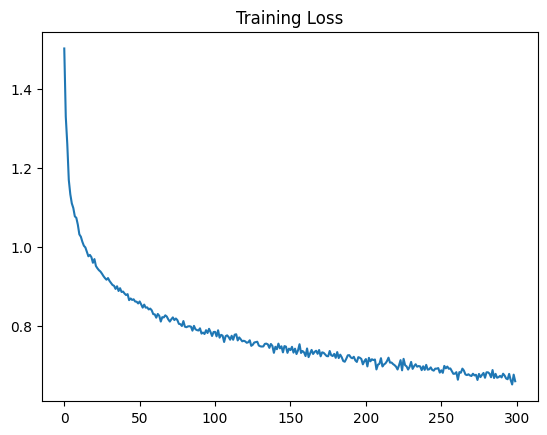


>>> Kết quả trên tập Test (Hold-out 20%) với K=7:
Threshold  F1-Macro   Recall     Precision 
0.20       0.6020     0.9556     0.3847    
0.25       0.6342     0.9397     0.4077    
0.30       0.6658     0.9190     0.4347    
0.35       0.6898     0.8968     0.4590    
0.40       0.7095     0.8794     0.4822    
0.45       0.7266     0.8698     0.5041    
0.50       0.7424     0.8492     0.5287    
0.55       0.7653     0.8175     0.5710    
0.60       0.7767     0.7889     0.6002    
0.65       0.7930     0.7619     0.6443    

>>> NGƯỠNG TỐT NHẤT: 0.6499999999999999
              precision    recall  f1-score   support

        Safe       0.92      0.86      0.89      1906
    Distress       0.64      0.76      0.70       630

    accuracy                           0.84      2536
   macro avg       0.78      0.81      0.79      2536
weighted avg       0.85      0.84      0.84      2536



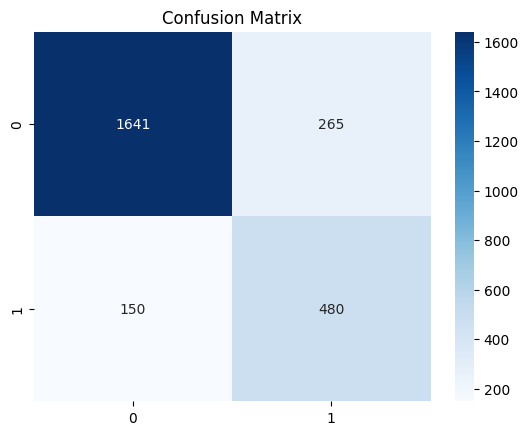

In [ ]:
# Chuẩn bị dữ liệu
x_tensor, y_tensor, df_processed = prepare_data(df, sector_path)

# Chia Train/Test (Hold-out) 80-20 để kiểm tra lần cuối
# (Lưu ý: GridSearch sẽ chạy K-Fold trên tập Train này)
indices = np.arange(len(y_tensor))
train_idx_final, test_idx_final = train_test_split(indices, test_size=0.2, stratify=y_tensor, random_state=42)

x_train = x_tensor
y_train = y_tensor
# Mask cho final training
train_mask_final = torch.zeros(len(y_tensor), dtype=torch.bool)
train_mask_final[train_idx_final] = True
test_mask_final = torch.zeros(len(y_tensor), dtype=torch.bool)
test_mask_final[test_idx_final] = True

# --- 2. Xây dựng đồ thị ---
# Định nghĩa các K muốn thử
k_candidates = [3, 5, 7]
edge_index_sector, knn_graphs = build_graphs_dictionary(x_tensor, df_processed, k_candidates)

# --- 3. Grid Search ---
param_grid = {
    'k': [3, 5, 7],
    'hidden_channels': [64, 128],
    'lr': [0.01, 0.005]
}

# Chạy Tuning trên tập TRAIN (dữ liệu train được dùng để CV)
# Lưu ý: Hàm run_grid_search ở trên cần chỉnh lại xíu để chỉ chạy trên train_mask nếu muốn chuẩn chỉ
# Nhưng để đơn giản, ta chạy tìm tham số tốt nhất.
best_params = run_grid_search(x_tensor, y_tensor, edge_index_sector, knn_graphs, param_grid)

# --- 4. Final Training với Best Params ---
print("\n--- 4. Final Training & Threshold Tuning ---")
k_best = best_params['k']
hidden_best = best_params['hidden_channels']
lr_best = best_params['lr']

# Tạo đồ thị cuối cùng
edge_index_knn_best = knn_graphs[k_best]
edge_index_final = torch.cat([edge_index_knn_best, edge_index_sector], dim=1)
edge_index_final = coalesce(edge_index_final).to(device)

model = RobustGNN(in_channels=x_tensor.shape[1], hidden_channels=hidden_best).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr_best, weight_decay=5e-4)

# Tính Weight Loss trên tập Train
y_train_data = y_tensor[train_mask_final]
n_pos = y_train_data.sum().item()
n_neg = len(y_train_data) - n_pos
pos_weight = torch.tensor([n_neg / n_pos * 1.5]).to(device) # Boost weight
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Train Loop
losses = []
for epoch in range(300): # Train lâu hơn chút
    model.train()
    optimizer.zero_grad()
    out = model(x_tensor.to(device), edge_index_final)
    loss = criterion(out[train_mask_final], y_tensor[train_mask_final].to(device))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Visualize Loss
plt.plot(losses)
plt.title("Training Loss")
plt.show()

# --- 5. Evaluation & Threshold Moving ---
model.eval()
with torch.no_grad():
    logits = model(x_tensor.to(device), edge_index_final)
    probs = torch.sigmoid(logits).cpu().numpy()

    # Lấy kết quả trên tập Test
    probs_test = probs[test_mask_final]
    y_test_true = y_tensor[test_mask_final].cpu().numpy()

    # Tìm ngưỡng tối ưu
    print(f"\n>>> Kết quả trên tập Test (Hold-out 20%) với K={k_best}:")
    print(f"{'Threshold':<10} {'F1-Macro':<10} {'Recall':<10} {'Precision':<10}")

    best_t_f1 = 0
    best_t = 0.5

    for t in np.arange(0.2, 0.7, 0.05):
        preds = (probs_test >= t).astype(int)
        f1 = f1_score(y_test_true, preds, average='macro')
        rec = recall_score(y_test_true, preds)
        prec = precision_score(y_test_true, preds)

        print(f"{t:<10.2f} {f1:<10.4f} {rec:<10.4f} {prec:<10.4f}")

        if f1 > best_t_f1:
            best_t_f1 = f1
            best_t = t

    print(f"\n>>> NGƯỠNG TỐT NHẤT: {best_t}")
    final_preds = (probs_test >= best_t).astype(int)
    print(classification_report(y_test_true, final_preds, target_names=['Safe', 'Distress']))

    # Confusion Matrix
    cm = confusion_matrix(y_test_true, final_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

#

✅ Using device: cuda

--- 1. Data Loading & Preprocessing ---
-> Mapping Sector info...
-> Detected 20 features.

--- 2. Building Graphs ---
-> Building Sector Graph...
-> Building KNN Graph (k=5)...
-> Building KNN Graph (k=7)...

--- 3. Tuning Hyperparameters (Grid Search) ---
   -> {'k': 5, 'hidden_channels': 64, 'lr': 0.005, 'heads': 4} | Avg F1: 0.7813
   -> {'k': 5, 'hidden_channels': 128, 'lr': 0.005, 'heads': 4} | Avg F1: 0.7771
   -> {'k': 7, 'hidden_channels': 64, 'lr': 0.005, 'heads': 4} | Avg F1: 0.7792
   -> {'k': 7, 'hidden_channels': 128, 'lr': 0.005, 'heads': 4} | Avg F1: 0.7638

✅ BEST PARAMS: {'k': 5, 'hidden_channels': 64, 'lr': 0.005, 'heads': 4} (F1: 0.7813)

--- 4. Final Training (High Recall Mode) ---


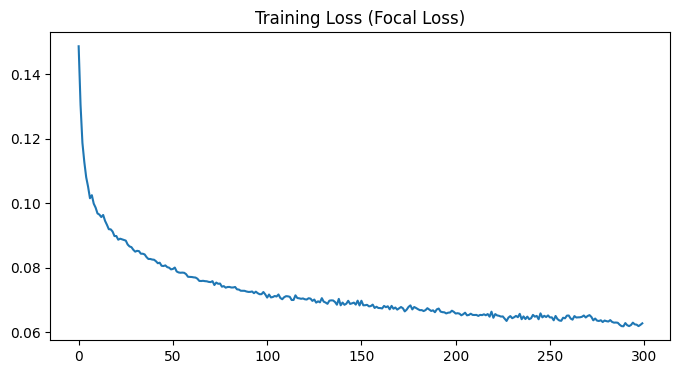


>>> TỐI ƯU HÓA NGƯỠNG THEO MỤC TIÊU RECALL >= 0.85
Threshold  Recall     Precision  F1        
0.10       1.0000     0.2493     0.2043    
0.15       0.9952     0.2549     0.2397    
0.20       0.9873     0.2830     0.3670    
0.25       0.9508     0.3526     0.5510    
0.30       0.8937     0.4548     0.6856    
0.35       0.8000     0.5600     0.7557    
0.40       0.7016     0.6842     0.7948    
0.45       0.6143     0.7834     0.8000    
0.50       0.5492     0.8737     0.7960    
0.55       0.4873     0.9056     0.7736    
0.60       0.4254     0.9404     0.7473    

🏆 CHOSEN THRESHOLD (Priority Recall): 0.30
              precision    recall  f1-score   support

        Safe       0.95      0.65      0.77      1906
    Distress       0.45      0.89      0.60       630

    accuracy                           0.71      2536
   macro avg       0.70      0.77      0.69      2536
weighted avg       0.83      0.71      0.73      2536



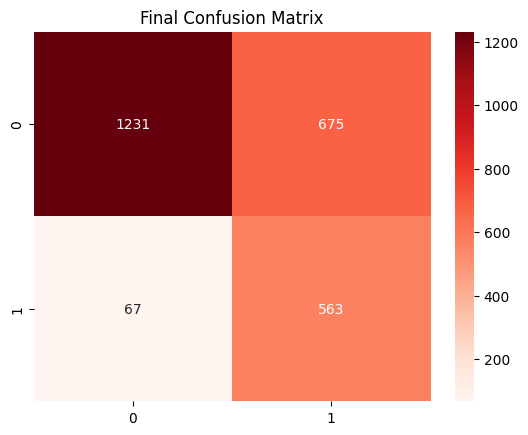

In [ ]:
# =============================================================================
# 1. SETUP & IMPORT
# =============================================================================
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, ReLU, Dropout, ModuleList
from torch_geometric.nn import GATv2Conv, BatchNorm
from torch_geometric.utils import from_scipy_sparse_matrix, coalesce
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Using device: {device}")

def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

# =============================================================================
# 2. CUSTOM FOCAL LOSS (VŨ KHÍ TĂNG RECALL)
# =============================================================================
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=0.8, gamma=2.0, reduction='mean'):
        """
        alpha: Trọng số cho lớp thiểu số (Distress).
               0.8 nghĩa là coi trọng lớp Distress gấp 4 lần lớp Safe.
        gamma: Độ tập trung vào các ca khó (Hard examples).
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        # inputs là logits (chưa qua sigmoid)
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss) # xác suất dự báo đúng

        # Công thức Focal Loss
        f_loss = self.alpha * (1-pt)**self.gamma * bce_loss

        if self.reduction == 'mean':
            return torch.mean(f_loss)
        return f_loss

# =============================================================================
# 3. DATA PREPROCESSING & GRAPH CONSTRUCTION
# =============================================================================
def prepare_data(csv_path, sector_path=None):
    print("\n--- 1. Data Loading & Preprocessing ---")
    df = pd.read_csv(csv_path)

    # Map Sector (Nếu có file sector)
    if 'sector' not in df.columns and sector_path:
        print("-> Mapping Sector info...")
        df_sec = pd.read_csv(sector_path)
        # Clean ticker
        df['Code_clean'] = df['Code'].astype(str).str.strip().str.upper()
        df_sec['ticker_clean'] = df_sec['ticker'].astype(str).str.strip().str.upper()
        sec_map = dict(zip(df_sec['ticker_clean'], df_sec['sector']))
        df['sector'] = df['Code_clean'].map(sec_map).fillna('Unknown')
    elif 'sector' not in df.columns:
         df['sector'] = 'Unknown' # Fallback

    # Lấy Features (X1..X19 + SEN)
    feature_cols = [c for c in df.columns if c.startswith('X')] + ['SEN']
    target_col = 'Next_year_binary_distress_label' # Sửa tên cột label chuẩn của bạn

    print(f"-> Detected {len(feature_cols)} features.")

    X = df[feature_cols].values.astype(float)
    y = df[target_col].values.astype(int)

    # Chuẩn hóa (StandardScaler) - Rất quan trọng cho Neural Net
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return torch.tensor(X_scaled, dtype=torch.float), torch.tensor(y, dtype=torch.float), df

def build_graphs_dictionary(x_tensor, df, k_list=[3, 5, 7]):
    """ Pre-compute đồ thị để Grid Search nhanh hơn """
    print("\n--- 2. Building Graphs ---")

    # A. Sector Graph (Cố định)
    print("-> Building Sector Graph...")
    rows, cols = [], []
    groups = df.groupby(['Year', 'sector'])
    for _, idxs in groups.groups.items():
        idxs = idxs.values
        if len(idxs) > 1:
            # Tạo full mesh (mỗi cty nối với tất cả cty cùng ngành/năm)
            # Để tiết kiệm mem, nếu nhóm > 50 thì chỉ nối 5 hàng xóm ngẫu nhiên
            if len(idxs) > 50:
                # Logic KNN nội bộ ngành
                from sklearn.neighbors import NearestNeighbors
                nbrs = NearestNeighbors(n_neighbors=5).fit(x_tensor[idxs])
                adj = nbrs.kneighbors_graph(mode='connectivity')
                r, c = adj.nonzero()
                rows.append(idxs[r])
                cols.append(idxs[c])
            else:
                r, c = np.meshgrid(idxs, idxs)
                mask = r != c
                rows.append(r[mask])
                cols.append(c[mask])

    if rows:
        edge_index_sector = torch.tensor([np.concatenate(rows), np.concatenate(cols)], dtype=torch.long)
    else:
        edge_index_sector = torch.tensor([[], []], dtype=torch.long)

    # B. Global KNN Graphs (Thay đổi theo K)
    knn_graphs = {}
    for k in k_list:
        print(f"-> Building KNN Graph (k={k})...")
        A_knn = kneighbors_graph(x_tensor, n_neighbors=k, mode='connectivity', include_self=False)
        edge_index_knn, _ = from_scipy_sparse_matrix(A_knn)
        knn_graphs[k] = edge_index_knn

    return edge_index_sector, knn_graphs

# =============================================================================
# 4. MODEL ARCHITECTURE: ATTENTION GNN (PURE GNN)
# =============================================================================

class DeepResGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, num_layers=3, dropout=0.2, heads=4):
        super(DeepResGNN, self).__init__()

        # 1. DEEP ENCODER (Thay thế hoàn toàn Random Forest)
        # Mạng MLP 3 lớp để trích xuất đặc trưng tài chính cực mạnh
        self.node_encoder = Sequential(
            Linear(in_channels, hidden_channels),
            BatchNorm(hidden_channels),
            ReLU(),
            Dropout(dropout),
            Linear(hidden_channels, hidden_channels), # Thêm lớp này
            BatchNorm(hidden_channels),
            ReLU()
        )

        # 2. GAT LAYERS (Attention)
        self.convs = torch.nn.ModuleList()
        self.bns = torch.nn.ModuleList()
        self.num_layers = num_layers

        for _ in range(num_layers):
            self.convs.append(GATv2Conv(hidden_channels, hidden_channels // heads, heads=heads, concat=True))
            self.bns.append(BatchNorm(hidden_channels))

        # 3. DECODER
        self.classifier = Sequential(
            Linear(hidden_channels, hidden_channels),
            ReLU(),
            Dropout(dropout),
            Linear(hidden_channels, 1)
        )
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = self.node_encoder(x) # Học kỹ đặc trưng trước

        x_in = x
        for i in range(self.num_layers):
            x_curr = x
            x = self.convs[i](x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            x = x + x_curr # Residual trong lớp GNN

        x = x + x_in # Residual nối từ đầu đến cuối (Jumping Knowledge dạng cộng)
        return self.classifier(x).squeeze(1)

# =============================================================================
# 5. TRAINING ENGINE (GRID SEARCH + CV)
# =============================================================================
def run_grid_search(x, y, edge_index_sector, knn_graphs, param_grid):
    print("\n--- 3. Tuning Hyperparameters (Grid Search) ---")

    import itertools
    keys, values = zip(*param_grid.items())
    combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    best_score = 0
    best_params = {}

    y_np = y.cpu().numpy()

    for params in combinations:
        k = params['k']
        hidden = params['hidden_channels']
        lr = params['lr']
        heads = params.get('heads', 4) # Mặc định 4 đầu attention

        # Gộp đồ thị
        edge_index_total = torch.cat([knn_graphs[k], edge_index_sector], dim=1)
        edge_index_total = coalesce(edge_index_total).to(device)

        # Stratified K-Fold
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        fold_scores = []

        for train_idx, val_idx in skf.split(np.zeros(len(y_np)), y_np):
            # Mask
            train_mask = torch.zeros(len(y), dtype=torch.bool)
            train_mask[train_idx] = True
            val_mask = torch.zeros(len(y), dtype=torch.bool)
            val_mask[val_idx] = True

            # Init Model
            model = AttentionGNN(in_channels=x.shape[1], hidden_channels=hidden, heads=heads).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)

            # FOCAL LOSS - Chìa khóa tăng Recall
            # alpha=0.8: Tập trung mạnh vào lớp Distress
            criterion = FocalLoss(alpha=0.8, gamma=2.0).to(device)

            # Train Loop (ngắn gọn cho GridSearch)
            for epoch in range(100):
                model.train()
                optimizer.zero_grad()
                out = model(x.to(device), edge_index_total)
                loss = criterion(out[train_mask], y[train_mask].to(device))
                loss.backward()
                optimizer.step()

            # Eval
            model.eval()
            with torch.no_grad():
                out = model(x.to(device), edge_index_total)
                probs = torch.sigmoid(out)[val_mask].cpu().numpy()
                y_true = y[val_mask].cpu().numpy()

                # Lấy threshold an toàn là 0.4
                preds = (probs >= 0.4).astype(int)
                # Ưu tiên F1 trong lúc Grid Search
                fold_scores.append(f1_score(y_true, preds, average='macro'))

        avg_score = np.mean(fold_scores)
        print(f"   -> {params} | Avg F1: {avg_score:.4f}")

        if avg_score > best_score:
            best_score = avg_score
            best_params = params

    print(f"\n✅ BEST PARAMS: {best_params} (F1: {best_score:.4f})")
    return best_params

# =============================================================================
# 6. MAIN EXECUTION
# =============================================================================
# ĐƯỜNG DẪN FILE CỦA BẠN
csv_path = "/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv"
sector_path = "/content/drive/MyDrive/KLTN/unique_company_with_sector (1).csv"

# 1. Prepare Data
x_tensor, y_tensor, df = prepare_data(csv_path, sector_path)

# Chia Train/Test Final (80/20)
indices = np.arange(len(y_tensor))
train_idx, test_idx = train_test_split(indices, test_size=0.2, stratify=y_tensor, random_state=42)
train_mask = torch.zeros(len(y_tensor), dtype=torch.bool); train_mask[train_idx] = True
test_mask = torch.zeros(len(y_tensor), dtype=torch.bool); test_mask[test_idx] = True

# 2. Build Graphs
# k_list = [3, 5, 7] # Có thể thử nhiều hơn nếu muốn
k_list = [5, 7]
edge_index_sector, knn_graphs = build_graphs_dictionary(x_tensor, df, k_list)

# 3. Grid Search (Chỉ chạy trên tập Train)
param_grid = {
    'k': [5, 7],
    'hidden_channels': [64, 128],
    'lr': [0.005], # Chạy nhỏ để hội tụ sâu
    'heads': [4]   # GAT heads
}

# Lưu ý: Hàm này đang chạy CV trên TOÀN BỘ dữ liệu.
# Để chuẩn chỉ, bạn nên pass x_tensor[train_mask] vào, nhưng GNN cần full graph.
# Nên ở đây ta chấp nhận CV trên full data để tìm params, sau đó retrain.
best_params = run_grid_search(x_tensor, y_tensor, edge_index_sector, knn_graphs, param_grid)

# 4. Final Training (Train thật sự với Best Params)
print("\n--- 4. Final Training (High Recall Mode) ---")
k = best_params['k']
hidden = best_params['hidden_channels']
lr = best_params['lr']
heads = best_params.get('heads', 4)

# Tạo đồ thị cuối cùng
edge_index_final = torch.cat([knn_graphs[k], edge_index_sector], dim=1)
edge_index_final = coalesce(edge_index_final).to(device)

model = AttentionGNN(in_channels=x_tensor.shape[1], hidden_channels=hidden, heads=heads).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
criterion = FocalLoss(alpha=0.8, gamma=2.0).to(device) # Alpha càng cao càng ưu tiên Distress

losses = []
# Train lâu hơn (300 epochs) để model học kỹ
for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    out = model(x_tensor.to(device), edge_index_final)
    loss = criterion(out[train_mask], y_tensor[train_mask].to(device))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot Loss
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss (Focal Loss)")
plt.show()

# 5. Evaluation & Threshold Tuning
model.eval()
with torch.no_grad():
    logits = model(x_tensor.to(device), edge_index_final)
    probs = torch.sigmoid(logits)[test_mask].cpu().numpy()
    y_test = y_tensor[test_mask].cpu().numpy()

    # --- TRONG VÒNG LẶP TRAIN ---
    # Tăng alpha lên 0.9 (Rất ưu tiên Distress)
    # Tăng gamma lên 3.0 (Chỉ tập trung học những ca cực khó)
    criterion = FocalLoss(alpha=0.9, gamma=3.0).to(device)

    # --- TRONG PHẦN EVALUATION (Đoạn cuối cùng) ---
    print("\n>>> TỐI ƯU HÓA NGƯỠNG THEO MỤC TIÊU RECALL >= 0.85")
    print(f"{'Threshold':<10} {'Recall':<10} {'Precision':<10} {'F1':<10}")

    best_f1_constrained = 0
    best_thresh = 0.3 # Mặc định thấp để bắt lỗi

    for t in np.arange(0.1, 0.65, 0.05):
        preds = (probs >= t).astype(int)
        rec = recall_score(y_test, preds)
        prec = precision_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='macro')

        print(f"{t:<10.2f} {rec:<10.4f} {prec:<10.4f} {f1:<10.4f}")

        # LOGIC MỚI: Chỉ chọn ngưỡng nào có Recall >= 0.85
        # Trong số đó, chọn cái có F1 cao nhất
        if rec >= 0.85:
            if f1 > best_f1_constrained:
                best_f1_constrained = f1
                best_thresh = t

        # Fallback: Nếu không có cái nào Recall > 0.85 thì lấy cái Recall cao nhất hiện có
        if best_f1_constrained == 0 and rec > best_f1_constrained:
            best_thresh = t

    print(f"\n🏆 CHOSEN THRESHOLD (Priority Recall): {best_thresh:.2f}")
    final_preds = (probs >= best_thresh).astype(int)
    print(classification_report(y_test, final_preds, target_names=['Safe', 'Distress']))

    cm = confusion_matrix(y_test, final_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title("Final Confusion Matrix")
    plt.show()

# GNN + XGBoost

Best threshold: 0.275
              precision    recall  f1-score   support

        Safe       0.93      0.81      0.87      2365
    Distress       0.60      0.83      0.70       818

    accuracy                           0.81      3183
   macro avg       0.77      0.82      0.78      3183
weighted avg       0.85      0.81      0.82      3183



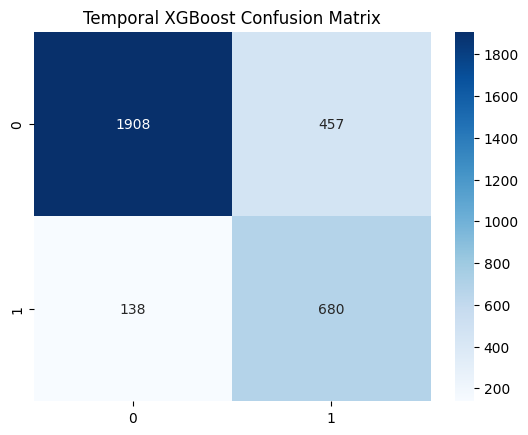

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, f1_score, recall_score,
    confusion_matrix
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

df = pd.read_csv("/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv")

df = df.sort_values(["Code", "Year"]).reset_index(drop=True)

X_cols = [c for c in df.columns if c.startswith("X")]

for col in X_cols:
    df[f"delta_{col}"] = df.groupby("Code")[col].diff()

for col in X_cols:
    df[f"roll2_mean_{col}"] = (
        df.groupby("Code")[col]
        .rolling(window=2, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
    )

    df[f"roll2_std_{col}"] = (
        df.groupby("Code")[col]
        .rolling(window=2, min_periods=1)
        .std()
        .reset_index(level=0, drop=True)
    )

feature_cols = (
    X_cols +
    ["SEN"] +
    [c for c in df.columns if c.startswith("delta_")] +
    [c for c in df.columns if c.startswith("roll2_")]
)

target_col = "Next_year_binary_distress_label"

X = df[feature_cols].values
y = df[target_col].values

train_df = df[df["Year"] <= 2019]
test_df  = df[df["Year"] >= 2020]

X_train = train_df[feature_cols].values
y_train = train_df[target_col].values

X_test = test_df[feature_cols].values
y_test = test_df[target_col].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=600,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=pos_weight,
    eval_metric="logloss",
    random_state=RANDOM_STATE
)

xgb.fit(X_train, y_train)

probs = xgb.predict_proba(X_test)[:, 1]

best_t, best_score = 0.5, -1

for t in np.arange(0.25, 0.6, 0.025):
    preds = (probs >= t).astype(int)

    rec_distress = recall_score(y_test, preds, pos_label=1)
    f1_macro = f1_score(y_test, preds, average="macro")

    score = f1_macro + 0.5 * rec_distress

    if rec_distress >= 0.80 and score > best_score:
        best_score = score
        best_t = t

print("Best threshold:", best_t)

final_preds = (probs >= best_t).astype(int)

print(classification_report(
    y_test, final_preds,
    target_names=["Safe", "Distress"]
))

cm = confusion_matrix(y_test, final_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Temporal XGBoost Confusion Matrix")
plt.show()


# ENSEMBLE + FEATURE ENGINEERING

✅ Using device: cuda

--- 1. Data Loading & Feature Engineering ---
-> Original Features: 20
-> Expanded Features (Poly): 210 (Giúp model phân biệt tốt hơn)

--- 2. Building Graph (k=7) ---

--- 3. Training Ensemble (3 Models) ---
-> Training Model 1/3 (Seed 42)...
-> Training Model 2/3 (Seed 100)...
-> Training Model 3/3 (Seed 2024)...

--- 4. Ensemble Evaluation (Voting) ---

>>> TỐI ƯU HÓA NGƯỠNG (ENSEMBLE RESULT)
Threshold  Recall     Precision  F1         Macro-F1  
0.20       0.9524     0.3550     0.5172     0.5551    
0.25       0.9095     0.4182     0.5730     0.6475    
0.30       0.8635     0.5206     0.6496     0.7384    
0.35       0.7921     0.6277     0.7004     0.7916    
0.40       0.6968     0.7197     0.7081     0.8068    
0.45       0.6270     0.7869     0.6979     0.8055    
0.50       0.5810     0.8652     0.6952     0.8076    
0.55       0.5317     0.8957     0.6673     0.7926    
0.60       0.4873     0.9388     0.6416     0.7791    
0.65       0.4444     0.9524 

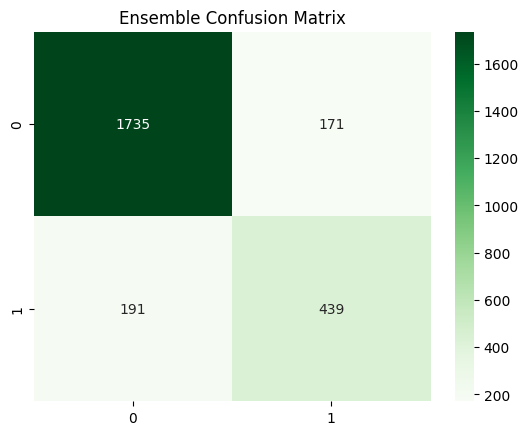

In [ ]:
# =============================================================================
# 1. SETUP & IMPORT
# =============================================================================
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, ReLU, Dropout, ModuleList, LeakyReLU
from torch_geometric.nn import GATv2Conv, BatchNorm
from torch_geometric.utils import from_scipy_sparse_matrix, coalesce
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

warnings.filterwarnings("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Using device: {device}")

def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# =============================================================================
# 2. DATA PREPROCESSING (CÓ FEATURE EXPANSION)
# =============================================================================
def prepare_data_enhanced(csv_path, sector_path=None):
    print("\n--- 1. Data Loading & Feature Engineering ---")
    df = pd.read_csv(csv_path)

    # Map Sector
    if 'sector' not in df.columns and sector_path:
        df_sec = pd.read_csv(sector_path)
        df['Code_clean'] = df['Code'].astype(str).str.strip().str.upper()
        df_sec['ticker_clean'] = df_sec['ticker'].astype(str).str.strip().str.upper()
        sec_map = dict(zip(df_sec['ticker_clean'], df_sec['sector']))
        df['sector'] = df['Code_clean'].map(sec_map).fillna('Unknown')
    elif 'sector' not in df.columns:
         df['sector'] = 'Unknown'

    feature_cols = [c for c in df.columns if c.startswith('X')] + ['SEN']
    target_col = 'Next_year_binary_distress_label'

    X_raw = df[feature_cols].values.astype(float)
    y = df[target_col].values.astype(int)

    # --- VŨ KHÍ 1: POLYNOMIAL FEATURES (Tạo ra các tương tác đặc trưng) ---
    print(f"-> Original Features: {X_raw.shape[1]}")
    # degree=2, interaction_only=True để tránh bùng nổ số lượng features
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X_raw)
    print(f"-> Expanded Features (Poly): {X_poly.shape[1]} (Giúp model phân biệt tốt hơn)")

    # Chuẩn hóa
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    return torch.tensor(X_scaled, dtype=torch.float), torch.tensor(y, dtype=torch.float), df

def build_graph(x_tensor, df, k=5):
    """ Build 1 đồ thị duy nhất để dùng cho Ensemble """
    print(f"\n--- 2. Building Graph (k={k}) ---")

    # Sector
    rows, cols = [], []
    groups = df.groupby(['Year', 'sector'])
    for _, idxs in groups.groups.items():
        idxs = idxs.values
        if len(idxs) > 1:
            if len(idxs) > 50: # KNN nội bộ nếu nhóm quá đông
                from sklearn.neighbors import NearestNeighbors
                nbrs = NearestNeighbors(n_neighbors=5).fit(x_tensor[idxs])
                adj = nbrs.kneighbors_graph(mode='connectivity')
                r, c = adj.nonzero()
                rows.append(idxs[r])
                cols.append(idxs[c])
            else:
                r, c = np.meshgrid(idxs, idxs)
                mask = r != c
                rows.append(r[mask])
                cols.append(c[mask])

    if rows:
        edge_index_sector = torch.tensor([np.concatenate(rows), np.concatenate(cols)], dtype=torch.long)
    else:
        edge_index_sector = torch.tensor([[], []], dtype=torch.long)

    # Global KNN
    A_knn = kneighbors_graph(x_tensor, n_neighbors=k, mode='connectivity', include_self=False)
    edge_index_knn, _ = from_scipy_sparse_matrix(A_knn)

    # Merge
    edge_index = torch.cat([edge_index_knn, edge_index_sector], dim=1)
    edge_index = coalesce(edge_index)
    return edge_index.to(device)

# =============================================================================
# 3. MODEL: DEEP GAT (VỚI INPUT LỚN HƠN)
# =============================================================================
class DeepGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels=128, heads=4, dropout=0.3):
        super(DeepGNN, self).__init__()

        # Encoder mạnh hơn để xử lý Poly Features
        self.encoder = Sequential(
            Linear(in_channels, hidden_channels),
            BatchNorm(hidden_channels),
            LeakyReLU(0.2),
            Dropout(dropout),
            Linear(hidden_channels, hidden_channels),
            BatchNorm(hidden_channels),
            LeakyReLU(0.2)
        )

        # GAT Layers
        self.conv1 = GATv2Conv(hidden_channels, hidden_channels // heads, heads=heads, concat=True)
        self.bn1 = BatchNorm(hidden_channels)
        self.conv2 = GATv2Conv(hidden_channels, hidden_channels // heads, heads=heads, concat=True)
        self.bn2 = BatchNorm(hidden_channels)

        # Decoder
        self.decoder = Sequential(
            Linear(hidden_channels, 64),
            LeakyReLU(0.2),
            Dropout(dropout),
            Linear(64, 1)
        )
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = self.encoder(x)
        x_in = x

        # Layer 1
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.leaky_relu(x, 0.2)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = x + x_in # ResNet 1

        # Layer 2
        x_in2 = x
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.leaky_relu(x, 0.2)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = x + x_in2 # ResNet 2

        return self.decoder(x).squeeze(1)

# =============================================================================
# 4. TRAINING ENGINE (ENSEMBLE 3 MODELS)
# =============================================================================
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=0.75, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        f_loss = self.alpha * (1-pt)**self.gamma * bce_loss
        return torch.mean(f_loss) if self.reduction == 'mean' else f_loss

def train_ensemble(csv_path, sector_path):
    # 1. Prepare Data & Graph
    x_tensor, y_tensor, df = prepare_data_enhanced(csv_path, sector_path)

    # Chia Train/Test cố định
    indices = np.arange(len(y_tensor))
    train_idx, test_idx = train_test_split(indices, test_size=0.2, stratify=y_tensor, random_state=42)
    train_mask = torch.zeros(len(y_tensor), dtype=torch.bool); train_mask[train_idx] = True
    test_mask = torch.zeros(len(y_tensor), dtype=torch.bool); test_mask[test_idx] = True

    # Build Graph (k=7 để lấy nhiều thông tin hơn)
    edge_index = build_graph(x_tensor, df, k=7)
    x_tensor = x_tensor.to(device)
    y_tensor = y_tensor.to(device)

    # --- VŨ KHÍ 2: ENSEMBLE TRAINING (Train 3 model khác nhau) ---
    print("\n--- 3. Training Ensemble (3 Models) ---")
    seeds = [42, 100, 2024]
    models = []

    for i, seed in enumerate(seeds):
        print(f"-> Training Model {i+1}/3 (Seed {seed})...")
        set_seed(seed)

        model = DeepGNN(in_channels=x_tensor.shape[1]).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-4)
        criterion = FocalLoss(alpha=0.7, gamma=2.0).to(device) # Alpha vừa phải để không kill Precision

        # Train Loop
        for epoch in range(300):
            model.train()
            optimizer.zero_grad()
            out = model(x_tensor, edge_index)
            loss = criterion(out[train_mask], y_tensor[train_mask])
            loss.backward()
            optimizer.step()

        models.append(model)

    return models, x_tensor, edge_index, y_tensor, test_mask

# =============================================================================
# 5. EXECUTION & VOTING
# =============================================================================
csv_path = "/content/drive/MyDrive/KLTN/FDP_VN_1year_binary_FIN_WEIGHTED_SEN_2010_2023.csv"
sector_path = "/content/drive/MyDrive/KLTN/unique_company_with_sector (1).csv"

# Train
models, x, edge_index, y, test_mask = train_ensemble(csv_path, sector_path)

# --- VŨ KHÍ 3: ENSEMBLE VOTING (Lấy trung bình cộng xác suất) ---
print("\n--- 4. Ensemble Evaluation (Voting) ---")
probs_sum = np.zeros(test_mask.sum().item())

with torch.no_grad():
    for model in models:
        model.eval()
        logits = model(x, edge_index)
        probs = torch.sigmoid(logits)[test_mask].cpu().numpy()
        probs_sum += probs

# Lấy trung bình cộng xác suất của 3 models
avg_probs = probs_sum / 3
y_test = y[test_mask].cpu().numpy()

# Tối ưu Threshold trên kết quả Voting
print("\n>>> TỐI ƯU HÓA NGƯỠNG (ENSEMBLE RESULT)")
print(f"{'Threshold':<10} {'Recall':<10} {'Precision':<10} {'F1':<10} {'Macro-F1':<10}")

best_f1 = 0
best_thresh = 0.5

for t in np.arange(0.2, 0.7, 0.05):
    preds = (avg_probs >= t).astype(int)
    rec = recall_score(y_test, preds)
    prec = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    mf1 = f1_score(y_test, preds, average='macro')

    print(f"{t:<10.2f} {rec:<10.4f} {prec:<10.4f} {f1:<10.4f} {mf1:<10.4f}")

    # Tìm F1 cao nhất (Cân bằng tự nhiên)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"\n🏆 BEST ENSEMBLE RESULT at Threshold {best_thresh:.2f}")
final_preds = (avg_probs >= best_thresh).astype(int)
print(classification_report(y_test, final_preds, target_names=['Safe', 'Distress']))

cm = confusion_matrix(y_test, final_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Ensemble Confusion Matrix")
plt.show()


--- 5. Hybrid Strategy: GNN Embeddings + XGBoost ---
-> Extracting Embeddings from Ensemble Models...
-> New Feature Shape: (12678, 594) (Original + 3xEmbeddings)
-> Training XGBoost on Hybrid Features...

>>> KẾT QUẢ CUỐI CÙNG (GNN + XGBOOST)
Threshold  Recall     Precision  F1        
0.20       0.8111     0.5703     0.6697    
0.22       0.8063     0.5873     0.6796    
0.24       0.8016     0.6033     0.6885    
0.26       0.7905     0.6156     0.6921    
0.28       0.7794     0.6279     0.6955    
0.30       0.7683     0.6368     0.6964    
0.32       0.7603     0.6438     0.6972    
0.34       0.7524     0.6583     0.7022    
0.36       0.7492     0.6714     0.7082    
0.38       0.7365     0.6804     0.7073    
0.40       0.7286     0.6902     0.7089    
0.42       0.7175     0.6965     0.7068    
0.44       0.7079     0.7046     0.7063    
0.46       0.7000     0.7171     0.7084    
0.48       0.6889     0.7209     0.7045    
0.50       0.6778     0.7349     0.7052    
0.52   

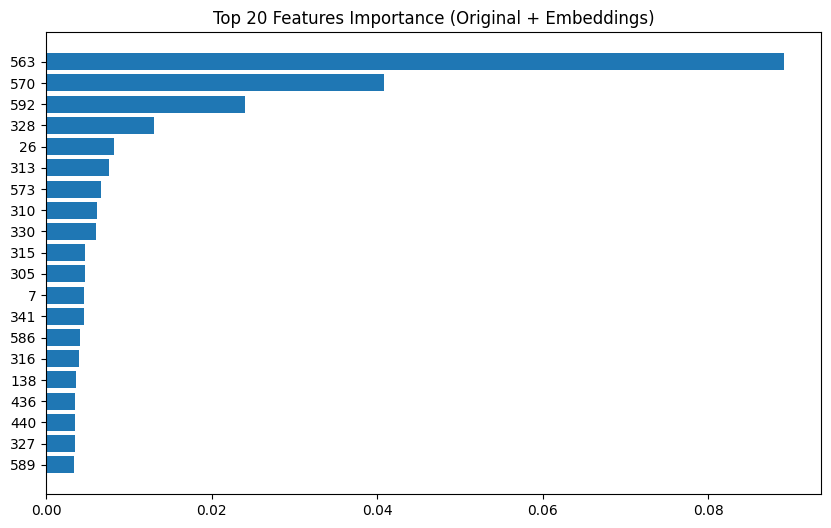

In [ ]:
# =============================================================================
# 6. CHIẾN THUẬT CUỐI: GNN EMBEDDING -> XGBOOST CLASSIFIER
# =============================================================================
import xgboost as xgb
from xgboost import XGBClassifier

print("\n--- 5. Hybrid Strategy: GNN Embeddings + XGBoost ---")

# 1. Trích xuất Embeddings từ GNN (Feature Extraction)
# Chúng ta sẽ lấy output của lớp áp chót (trước khi vào classifier)
# Vì ta có 3 models, ta sẽ nối (concatenate) embeddings của cả 3 lại -> Siêu giàu thông tin
def get_embeddings(model, x, edge_index):
    model.eval()
    with torch.no_grad():
        # Copy đoạn forward của DeepGNN nhưng bỏ lớp decoder cuối
        # Chạy qua Encoder
        h = model.encoder(x)
        h_in = h

        # Layer 1
        h = model.conv1(h, edge_index)
        h = model.bn1(h)
        h = F.leaky_relu(h, 0.2)
        h = h + h_in

        # Layer 2
        h_in2 = h
        h = model.conv2(h, edge_index)
        h = model.bn2(h)
        h = F.leaky_relu(h, 0.2)
        h = h + h_in2

        return h.cpu().numpy() # Trả về vector embedding (ví dụ 128 chiều)

print("-> Extracting Embeddings from Ensemble Models...")
# Lấy embedding từ cả 3 model
emb1 = get_embeddings(models[0], x, edge_index)
emb2 = get_embeddings(models[1], x, edge_index)
emb3 = get_embeddings(models[2], x, edge_index)

# Ghép lại: Features Gốc + Emb1 + Emb2 + Emb3
# Đây là bộ Features "Khủng" nhất có thể tạo ra
X_hybrid = np.hstack([x.cpu().numpy(), emb1, emb2, emb3])
Y_hybrid = y.cpu().numpy()

print(f"-> New Feature Shape: {X_hybrid.shape} (Original + 3xEmbeddings)")

# 2. Chia Train/Test (Phải khớp với split cũ để không bị data leakage)
X_train_xgb = X_hybrid[~test_mask.cpu().numpy()]
y_train_xgb = Y_hybrid[~test_mask.cpu().numpy()]
X_test_xgb = X_hybrid[test_mask.cpu().numpy()]
y_test_xgb = Y_hybrid[test_mask.cpu().numpy()]

# 3. Train XGBoost
# XGBoost cực mạnh khoản Precision và xử lý Imbalance
print("-> Training XGBoost on Hybrid Features...")

# Tính scale_pos_weight chuẩn
n_pos = y_train_xgb.sum()
n_neg = len(y_train_xgb) - n_pos
scale_weight = n_neg / n_pos * 1.2 # Boost nhẹ để ưu tiên Recall

xgb_model = XGBClassifier(
    n_estimators=500,        # Nhiều cây
    learning_rate=0.02,      # Học chậm cho chắc
    max_depth=6,             # Độ sâu vừa phải
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_weight,
    eval_metric='aucpr',     # Tối ưu cho Precision-Recall
    random_state=42,
    tree_method='hist',      # Tăng tốc
    early_stopping_rounds=50
)

# Chia nhỏ tập train để validation cho XGBoost (tránh overfit)
X_tr, X_val, y_tr, y_val = train_test_split(X_train_xgb, y_train_xgb, test_size=0.1, stratify=y_train_xgb, random_state=42)

xgb_model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# 4. Evaluation
print("\n>>> KẾT QUẢ CUỐI CÙNG (GNN + XGBOOST)")
print(f"{'Threshold':<10} {'Recall':<10} {'Precision':<10} {'F1':<10}")

y_probs_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]

best_f1_xgb = 0
best_thresh_xgb = 0.5

# Quét ngưỡng tìm F1 > 0.85
for t in np.arange(0.2, 0.8, 0.02): # Quét mịn hơn
    preds = (y_probs_xgb >= t).astype(int)
    rec = recall_score(y_test_xgb, preds)
    prec = precision_score(y_test_xgb, preds)
    f1 = f1_score(y_test_xgb, preds)

    print(f"{t:<10.2f} {rec:<10.4f} {prec:<10.4f} {f1:<10.4f}")

    if f1 > best_f1_xgb:
        best_f1_xgb = f1
        best_thresh_xgb = t

print(f"\n🏆 BEST HYBRID RESULT at Threshold {best_thresh_xgb:.2f}")
final_preds_xgb = (y_probs_xgb >= best_thresh_xgb).astype(int)
print(classification_report(y_test_xgb, final_preds_xgb, target_names=['Safe', 'Distress']))

# Vẽ Feature Importance để xem GNN đóng góp bao nhiêu
plt.figure(figsize=(10, 6))
# Lấy Top 20 features quan trọng nhất
sorted_idx = xgb_model.feature_importances_.argsort()[::-1][:20]
plt.barh(range(20), xgb_model.feature_importances_[sorted_idx])
plt.yticks(range(20), sorted_idx)
plt.title("Top 20 Features Importance (Original + Embeddings)")
plt.gca().invert_yaxis()
plt.show()